In [253]:
# Problem 1: Clustering
# A leading bank wants to develop a customer segmentation to give promotional offers to its customers. 
# They collected a sample that summarizes the activities of users during the past few months.
# You are given the task to identify the segments based on credit card usage.

In [319]:
import pandas as pd
pd.options.display.max_rows = None
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans 
import warnings
warnings.filterwarnings("ignore")

In [320]:
data=pd.read_csv("bank_marketing_part1_Data-1.csv")

In [321]:
data.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0     19.94             16.92                       0.8752            6.675   
1     15.99             14.89                       0.9064            5.363   
2     18.95             16.42                       0.8829            6.248   
3     10.83             12.96                       0.8099            5.278   
4     17.99             15.86                       0.8992            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  
0         3.763            3.252                         6.550  
1         3.582            3.336                         5.144  
2         3.755            3.368                         6.148  
3         2.641            5.182                         5.185  
4         3.694            2.068                         5.837

In [322]:
print('There are {} rows and {} columns in our dataset'.format(data.shape[0],data.shape[1]))

There are 210 rows and 7 columns in our dataset


In [323]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [324]:
data.describe().T

count       mean       std      min       25%  \
spending                      210.0  14.847524  2.909699  10.5900  12.27000   
advance_payments              210.0  14.559286  1.305959  12.4100  13.45000   
probability_of_full_payment   210.0   0.870999  0.023629   0.8081   0.85690   
current_balance               210.0   5.628533  0.443063   4.8990   5.26225   
credit_limit                  210.0   3.258605  0.377714   2.6300   2.94400   
min_payment_amt               210.0   3.700201  1.503557   0.7651   2.56150   
max_spent_in_single_shopping  210.0   5.408071  0.491480   4.5190   5.04500   

                                   50%        75%      max  
spending                      14.35500  17.305000  21.1800  
advance_payments              14.32000  15.715000  17.2500  
probability_of_full_payment    0.87345   0.887775   0.9183  
current_balance                5.52350   5.979750   6.6750  
credit_limit                   3.23700   3.561750   4.0330  
min_payment_amt                3.59900   4.768750   8.4560  
max_spent_in_single_shopping   5.22300   5.877000   6.5500

In [325]:
data.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [326]:
# Exploratory Data Analysis

Description of spending
----------------------------------------------------------------------------
count    210.000000
mean      14.847524
std        2.909699
min       10.590000
25%       12.270000
50%       14.355000
75%       17.305000
max       21.180000
Name: spending, dtype: float64 Distribution of spending
----------------------------------------------------------------------------


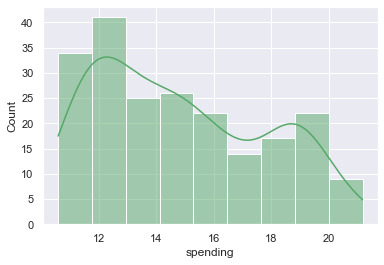

BoxPlot of spending
----------------------------------------------------------------------------


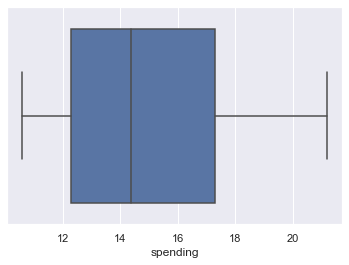

Description of advance_payments
----------------------------------------------------------------------------
count    210.000000
mean      14.559286
std        1.305959
min       12.410000
25%       13.450000
50%       14.320000
75%       15.715000
max       17.250000
Name: advance_payments, dtype: float64 Distribution of advance_payments
----------------------------------------------------------------------------


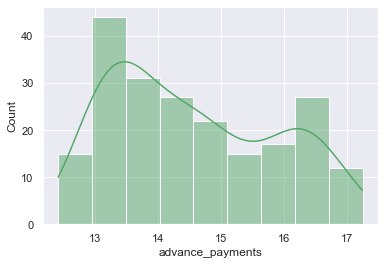

BoxPlot of advance_payments
----------------------------------------------------------------------------


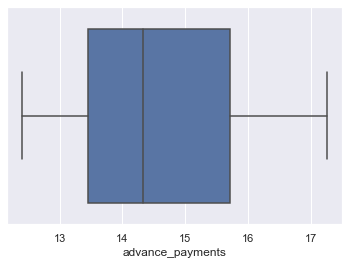

Description of probability_of_full_payment
----------------------------------------------------------------------------
count    210.000000
mean       0.870999
std        0.023629
min        0.808100
25%        0.856900
50%        0.873450
75%        0.887775
max        0.918300
Name: probability_of_full_payment, dtype: float64 Distribution of probability_of_full_payment
----------------------------------------------------------------------------


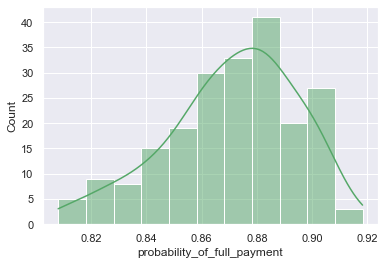

BoxPlot of probability_of_full_payment
----------------------------------------------------------------------------


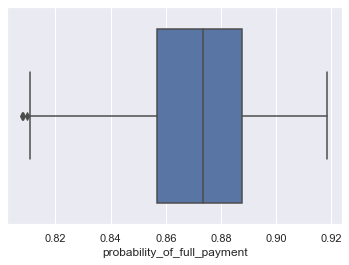

Description of current_balance
----------------------------------------------------------------------------
count    210.000000
mean       5.628533
std        0.443063
min        4.899000
25%        5.262250
50%        5.523500
75%        5.979750
max        6.675000
Name: current_balance, dtype: float64 Distribution of current_balance
----------------------------------------------------------------------------


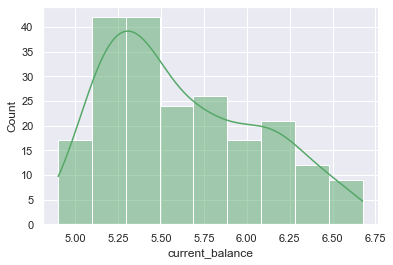

BoxPlot of current_balance
----------------------------------------------------------------------------


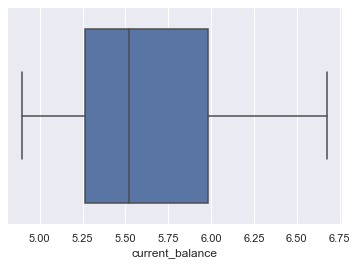

Description of credit_limit
----------------------------------------------------------------------------
count    210.000000
mean       3.258605
std        0.377714
min        2.630000
25%        2.944000
50%        3.237000
75%        3.561750
max        4.033000
Name: credit_limit, dtype: float64 Distribution of credit_limit
----------------------------------------------------------------------------


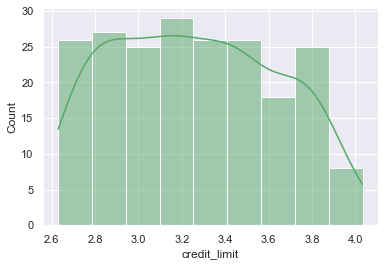

BoxPlot of credit_limit
----------------------------------------------------------------------------


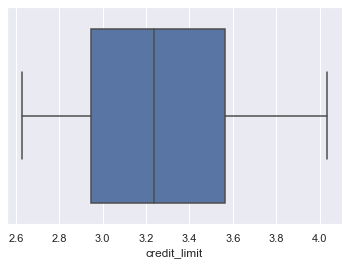

Description of min_payment_amt
----------------------------------------------------------------------------
count    210.000000
mean       3.700201
std        1.503557
min        0.765100
25%        2.561500
50%        3.599000
75%        4.768750
max        8.456000
Name: min_payment_amt, dtype: float64 Distribution of min_payment_amt
----------------------------------------------------------------------------


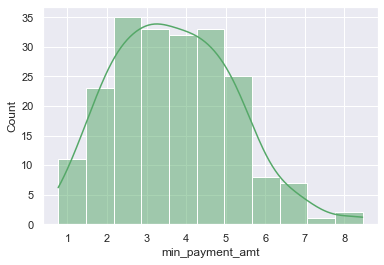

BoxPlot of min_payment_amt
----------------------------------------------------------------------------


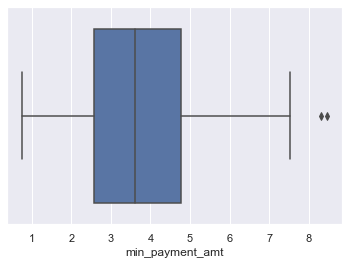

Description of max_spent_in_single_shopping
----------------------------------------------------------------------------
count    210.000000
mean       5.408071
std        0.491480
min        4.519000
25%        5.045000
50%        5.223000
75%        5.877000
max        6.550000
Name: max_spent_in_single_shopping, dtype: float64 Distribution of max_spent_in_single_shopping
----------------------------------------------------------------------------


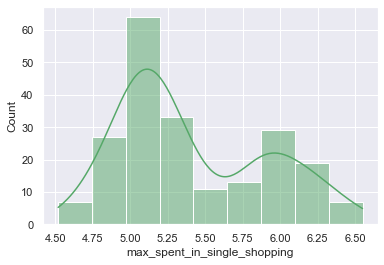

BoxPlot of max_spent_in_single_shopping
----------------------------------------------------------------------------


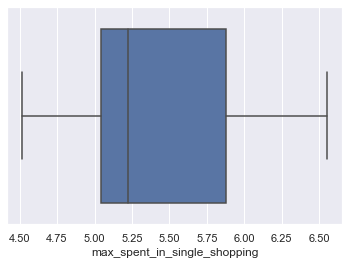

In [327]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(data[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.histplot(data[column], kde=True, color = 'g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    sns.boxplot(x = data[column])
    plt.show()

df_num = data.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

In [328]:
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()
    
    # Plot the pairwise joint distributions
    print("\nTo check pairwise joint distribution of numeric data")
    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()


To check: 
Distribution of numeric data


count       mean       std      min       25%  \
spending                      210.0  14.847524  2.909699  10.5900  12.27000   
advance_payments              210.0  14.559286  1.305959  12.4100  13.45000   
probability_of_full_payment   210.0   0.870999  0.023629   0.8081   0.85690   
current_balance               210.0   5.628533  0.443063   4.8990   5.26225   
credit_limit                  210.0   3.258605  0.377714   2.6300   2.94400   
min_payment_amt               210.0   3.700201  1.503557   0.7651   2.56150   
max_spent_in_single_shopping  210.0   5.408071  0.491480   4.5190   5.04500   

                                   50%        75%      max  
spending                      14.35500  17.305000  21.1800  
advance_payments              14.32000  15.715000  17.2500  
probability_of_full_payment    0.87345   0.887775   0.9183  
current_balance                5.52350   5.979750   6.6750  
credit_limit                   3.23700   3.561750   4.0330  
min_payment_amt                3.59900   4.768750   8.4560  
max_spent_in_single_shopping   5.22300   5.877000   6.5500

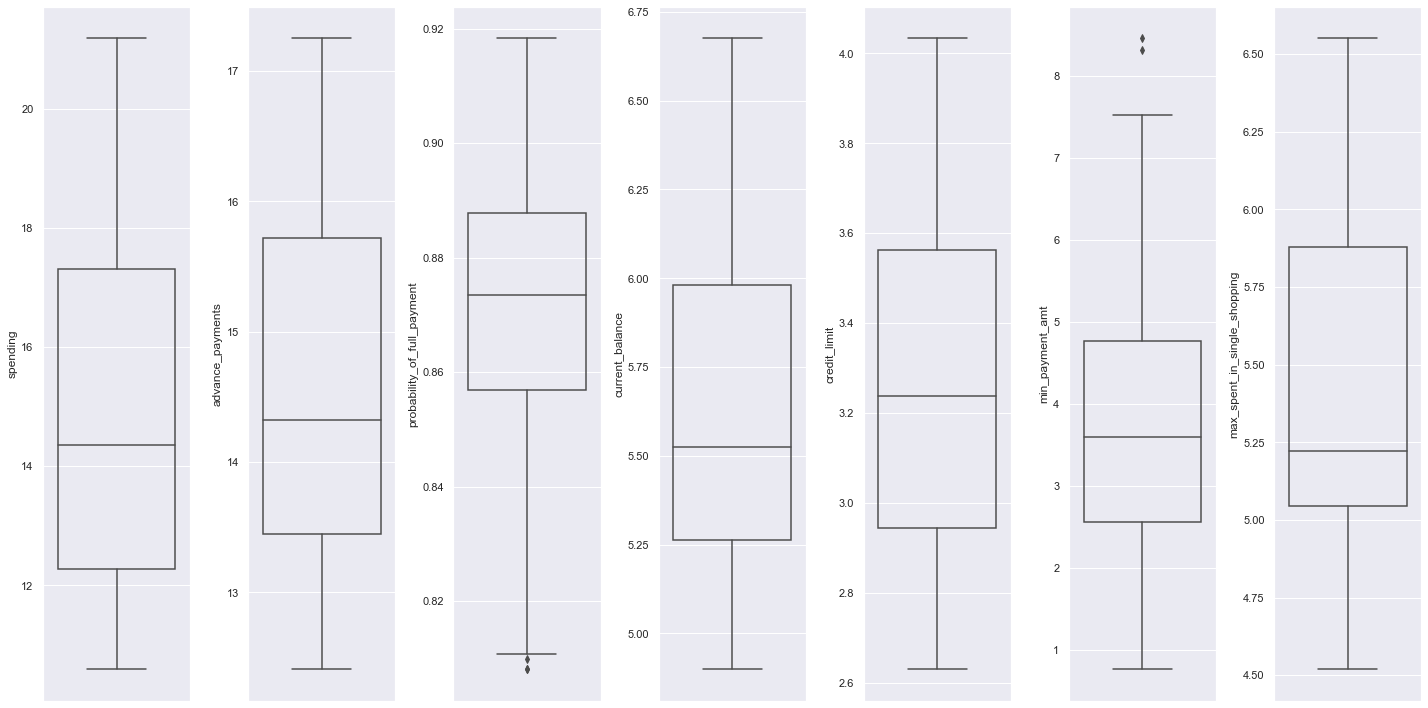


To check pairwise joint distribution of numeric data


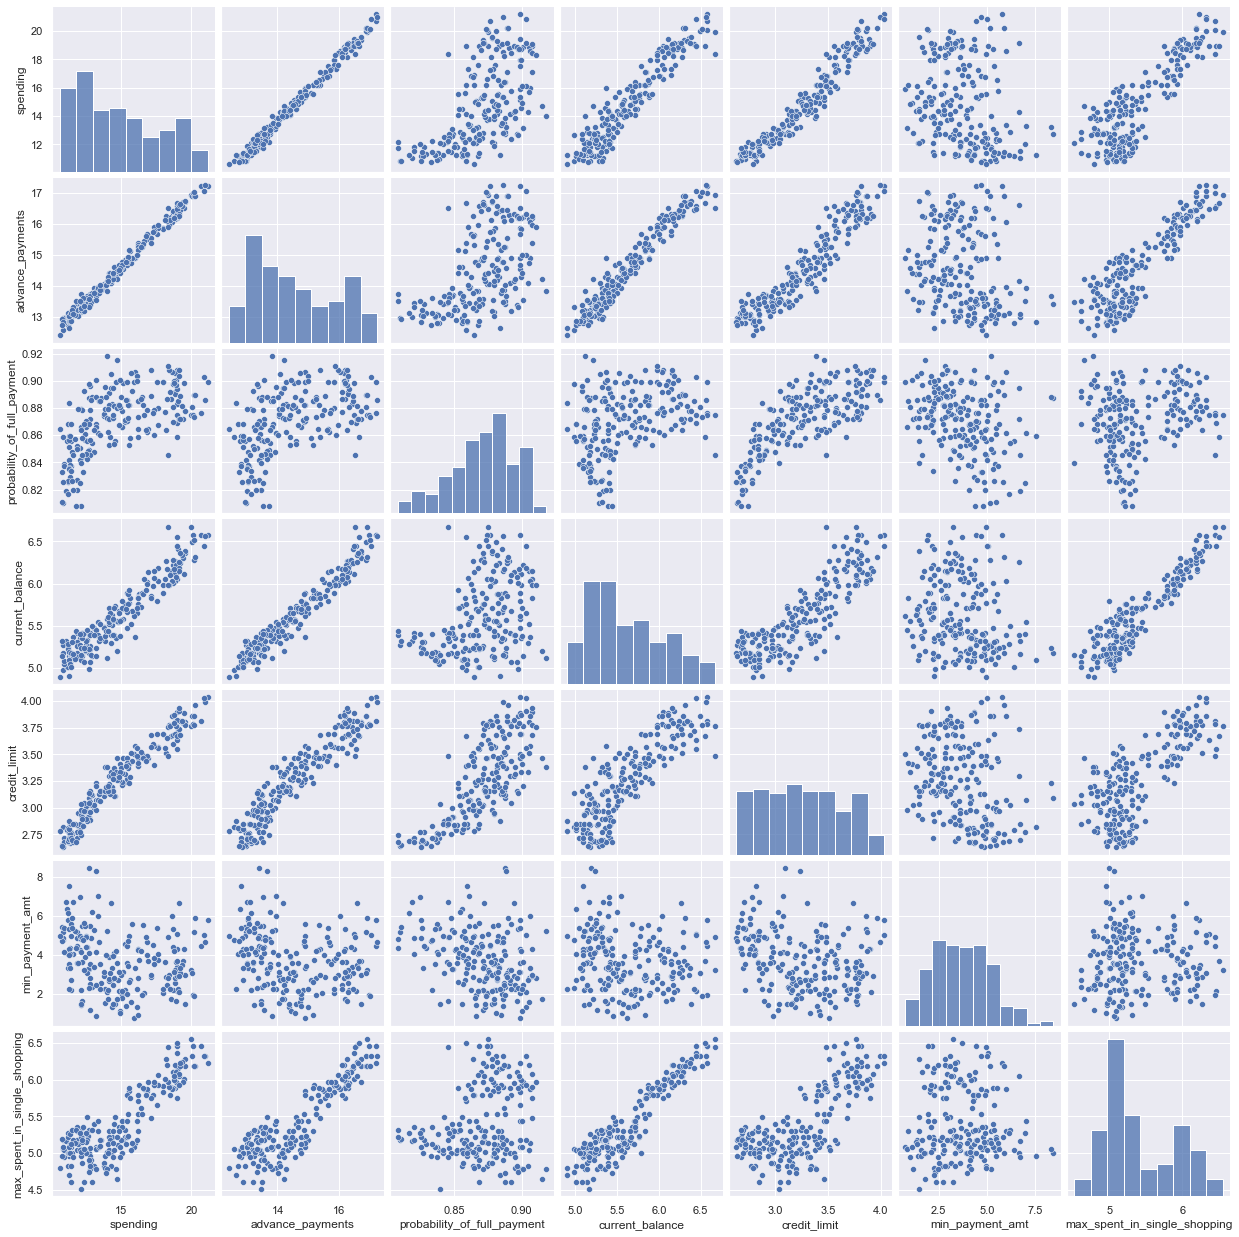

In [329]:
numeric_eda(data)

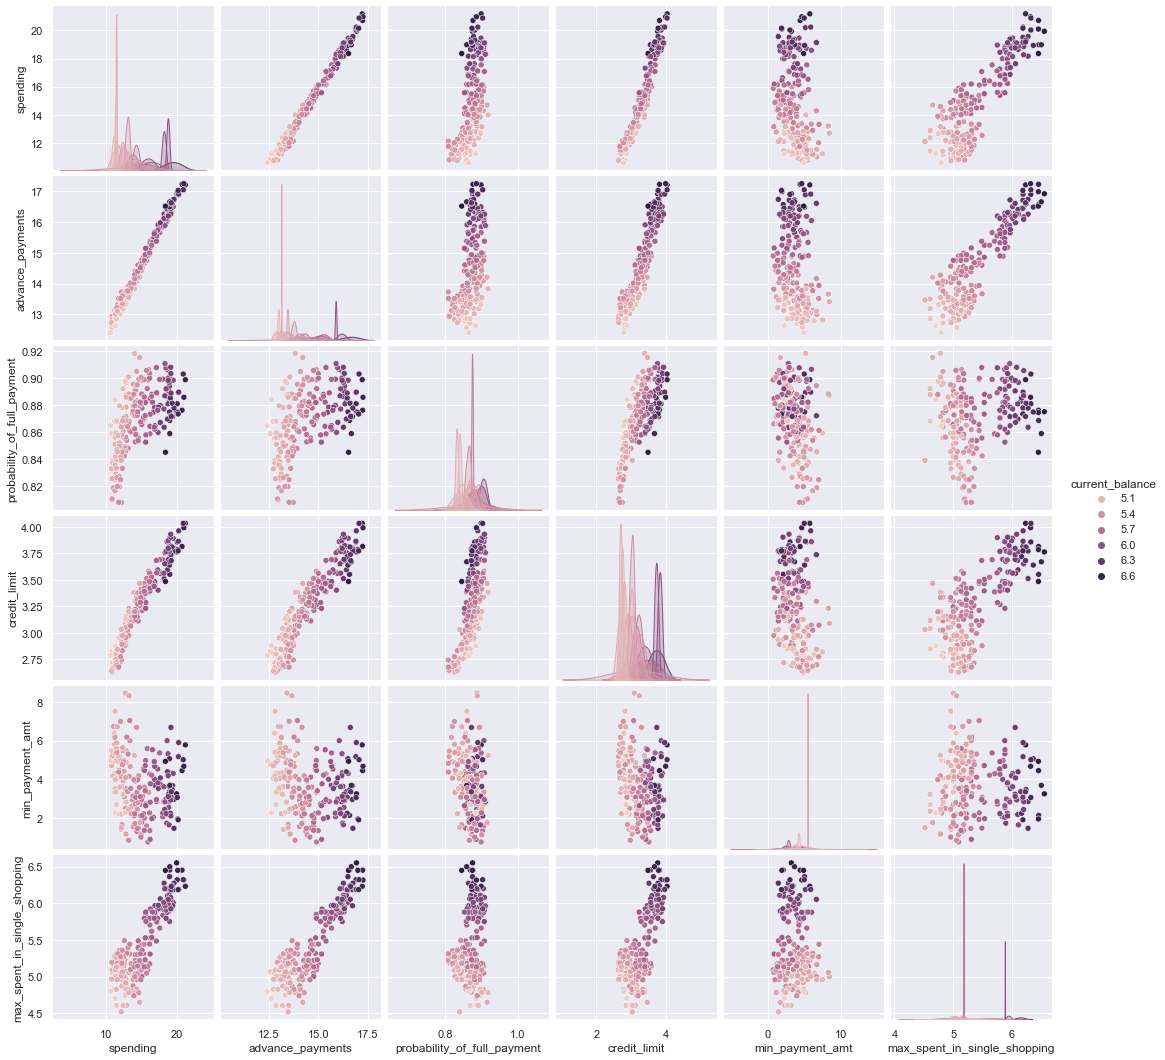

In [330]:
sns.pairplot(data, hue='current_balance')

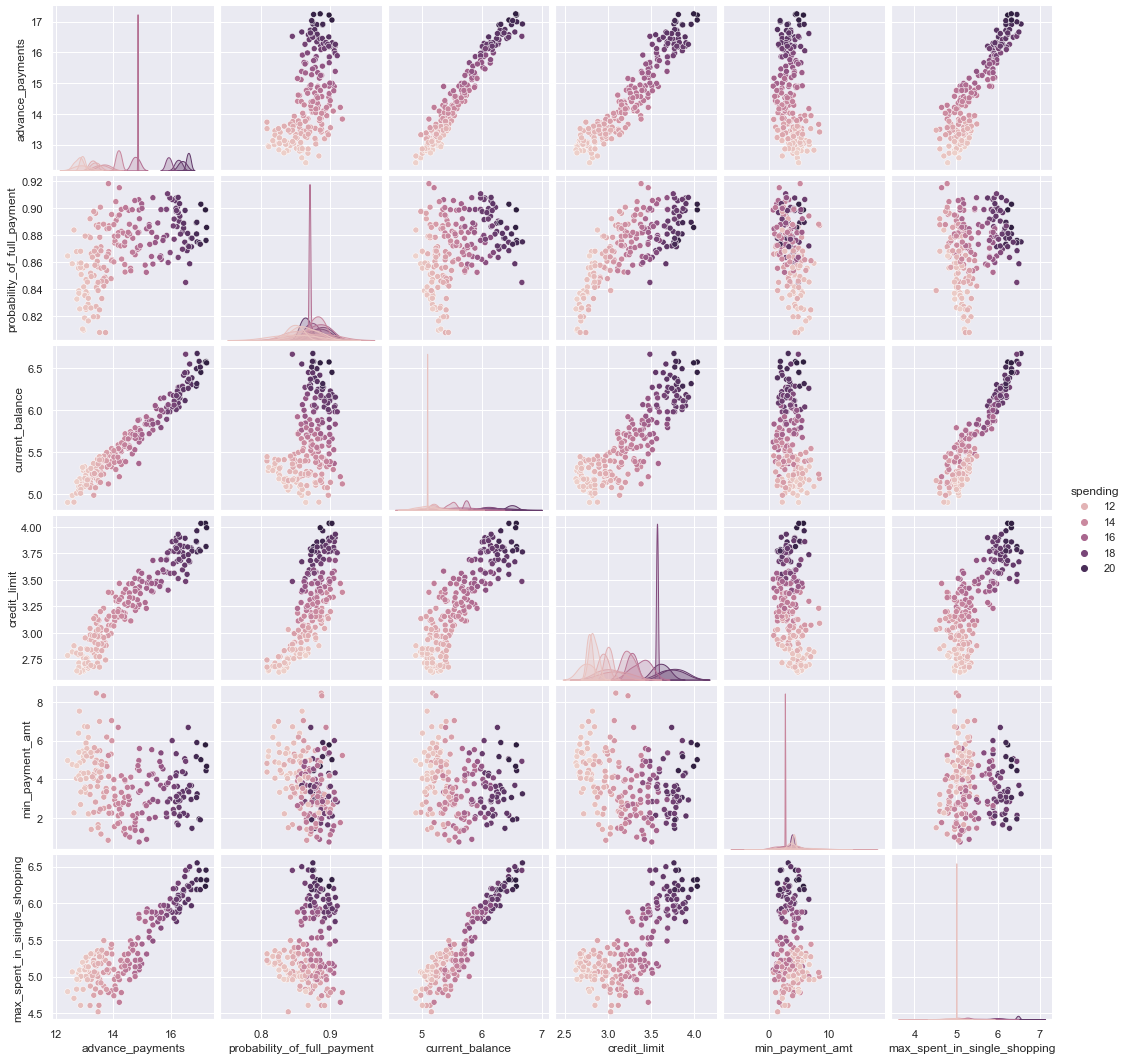

In [331]:
sns.pairplot(data, hue='spending')

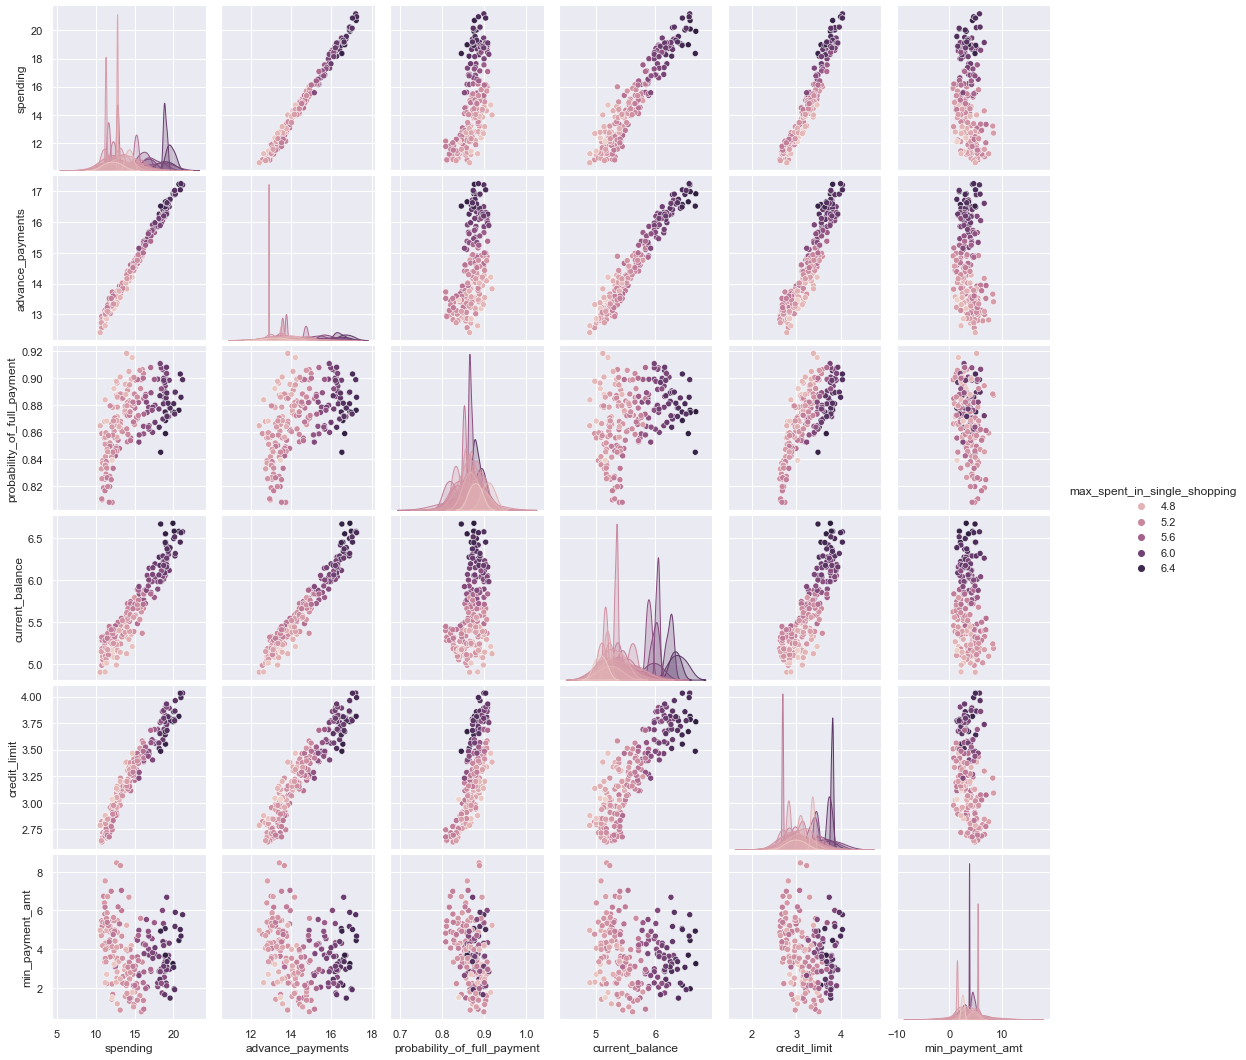

In [332]:
sns.pairplot(data, hue='max_spent_in_single_shopping')

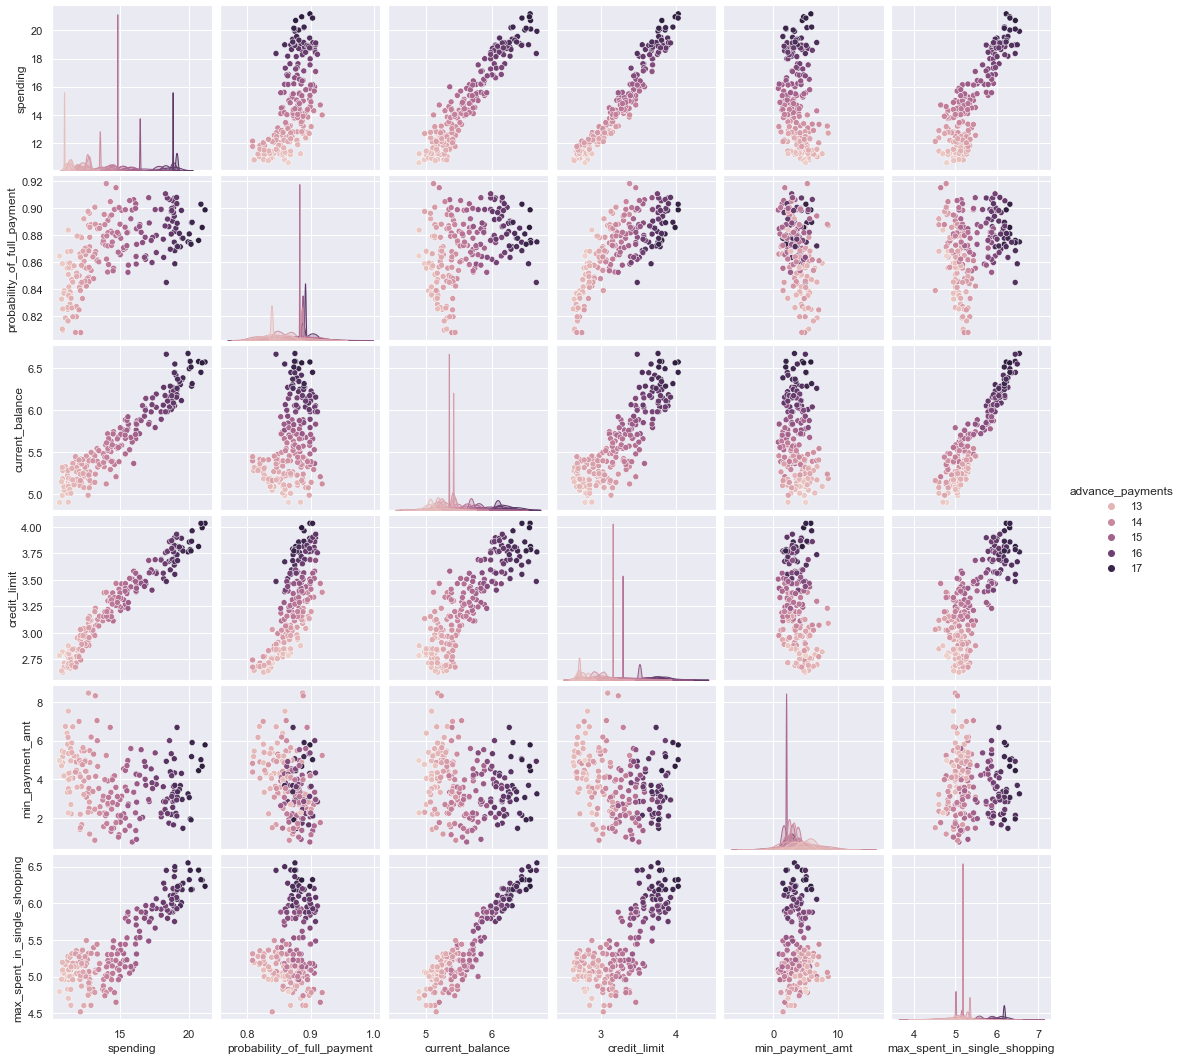

In [333]:
sns.pairplot(data, hue='advance_payments')

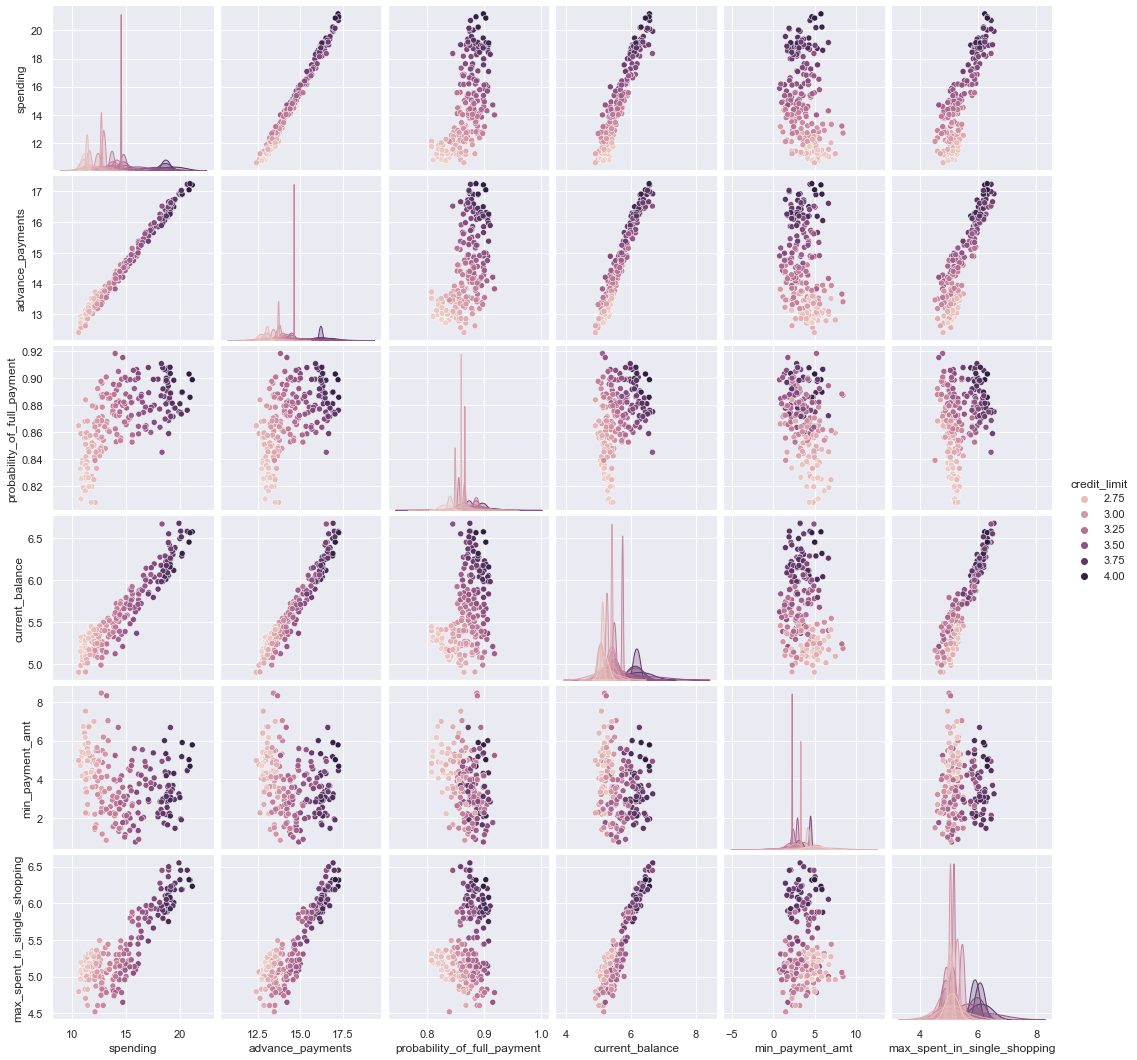

In [334]:
sns.pairplot(data, hue='credit_limit')

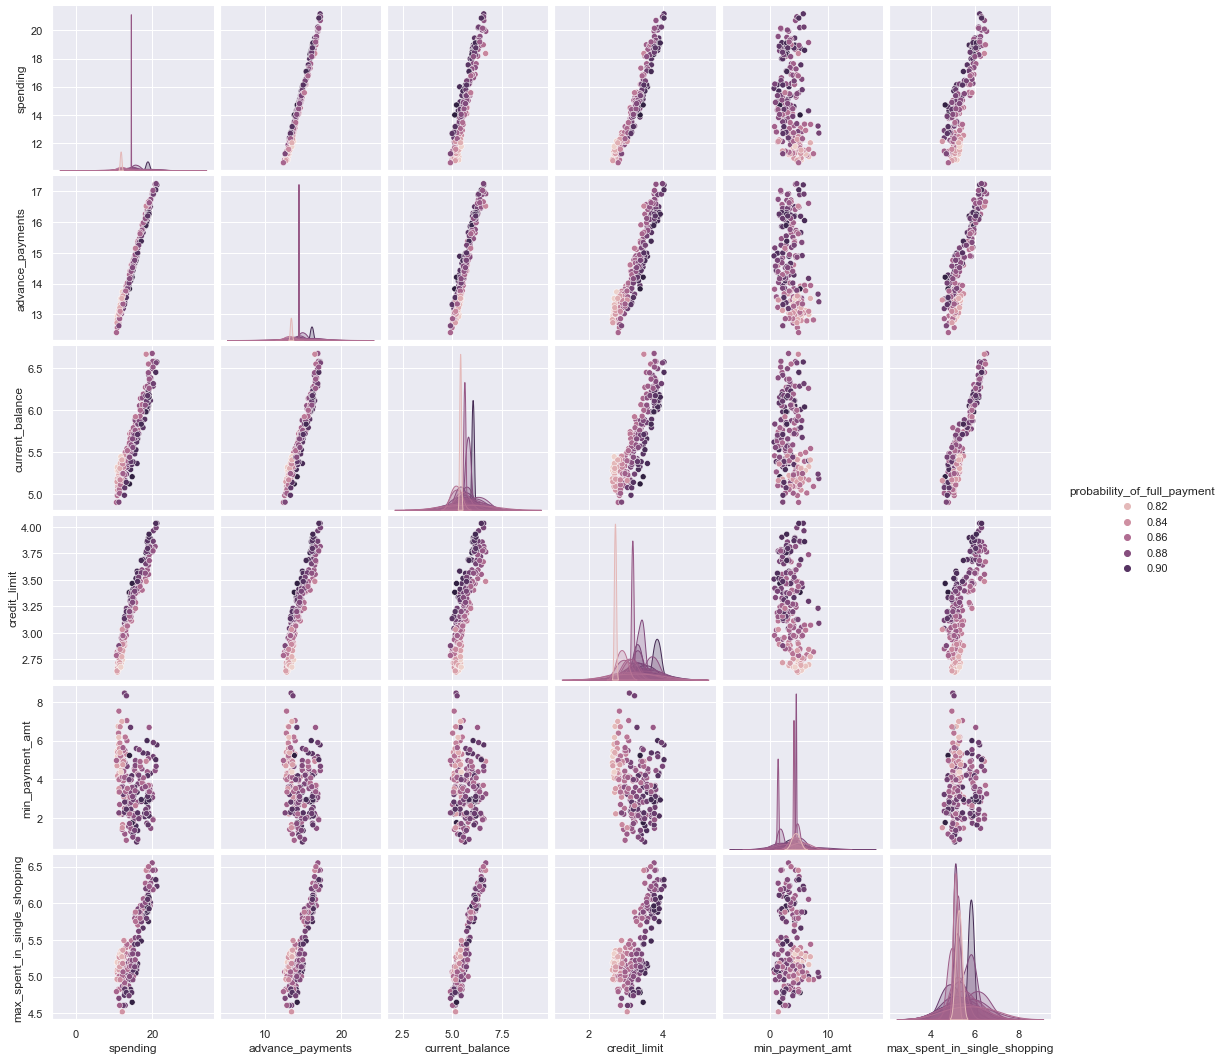

In [335]:
sns.pairplot(data, hue='probability_of_full_payment')

In [271]:
# Clustering
# KMeans
# DBSCAN
# MeanShift
# Agglomerative

In [272]:
# KMeans

In [336]:
from sklearn.cluster import KMeans

In [337]:
# For clustering only numeric columns are used.
# There might be some outliers
# These points do not meet distance and minimum samples requirements to be recognised as a cluster.

In [338]:
data.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping'],
      dtype='object')

In [339]:
X_numerics = data[['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping']] # subset with numeric variables only

In [277]:
# In order to find an appropriate number of clusters, the elbow method will be used. 
# In this method for this case, the inertia for a number of clusters between 2 and 10 will be calculated. 
# The rule is to choose the number of clusters where you see a kink or "an elbow" in the graph.

In [340]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(X_numerics)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(X_numerics, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

In [279]:
# The graph below shows the inertia for selected range of clusters.

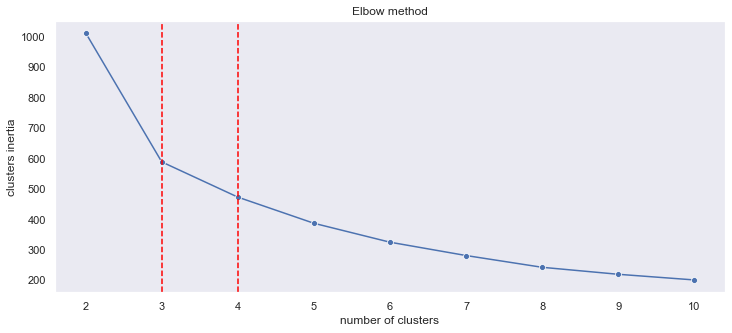

In [341]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
ax.axvline(3, ls="--", c="red")
ax.axvline(4, ls="--", c="red")
plt.grid()
plt.show()

In [281]:
# Except 3, there is no clear "elbow" visible. A choice of 3 or 4 clusters seems to be fair. Let's see the silhouette score.

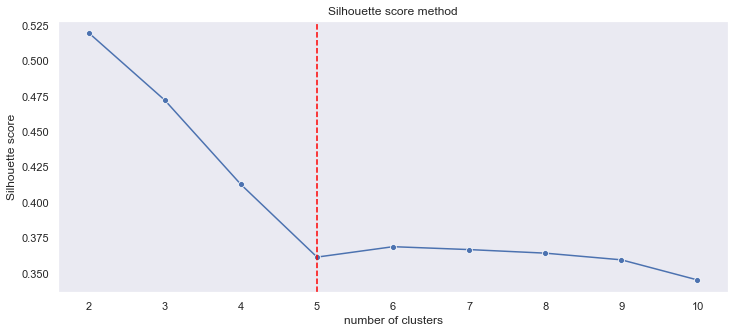

In [342]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(5, ls="--", c="red")
plt.grid()
plt.show()

In [343]:
# Silhouette score method indicates the best options would be respectively 5 or 4 clusters. Let's compare both.

In [344]:
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ # append labels to points

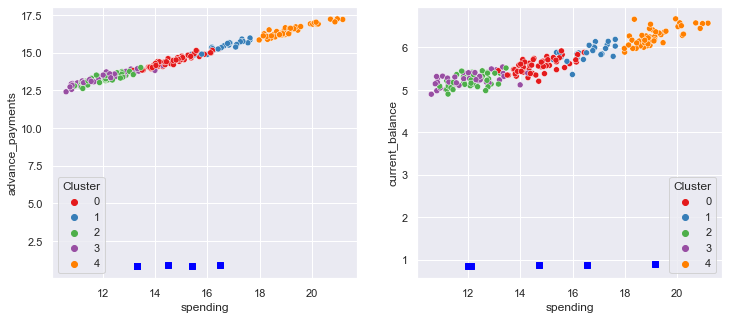

In [345]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot('spending', 'advance_payments', data=KM5_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('spending', 'current_balance', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

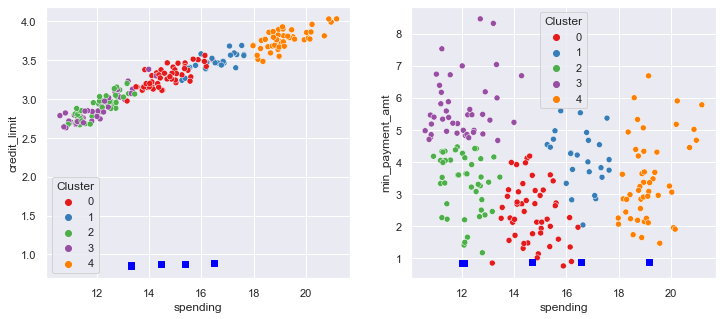

In [346]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot('spending', 'credit_limit', data=KM5_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('spending', 'min_payment_amt', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

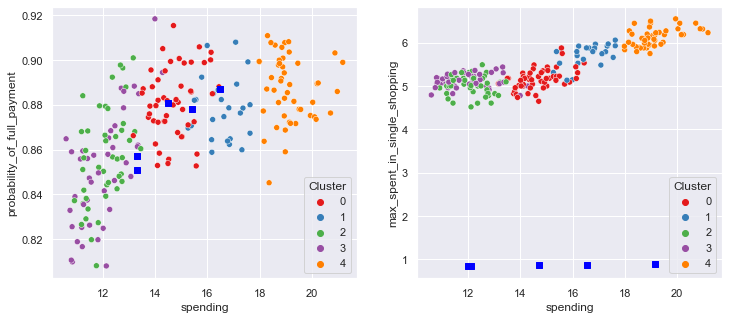

In [347]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot('spending', 'probability_of_full_payment', data=KM5_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('spending', 'max_spent_in_single_shopping', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

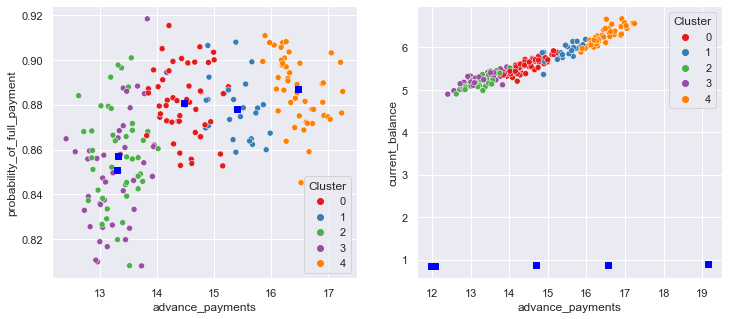

In [348]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot('advance_payments', 'probability_of_full_payment', data=KM5_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('advance_payments', 'current_balance', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

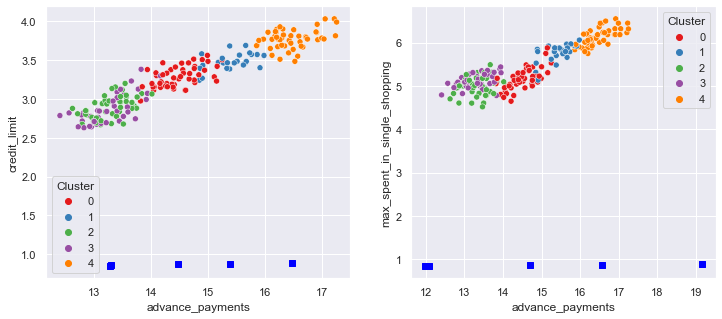

In [349]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot('advance_payments', 'credit_limit', data=KM5_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('advance_payments', 'max_spent_in_single_shopping', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

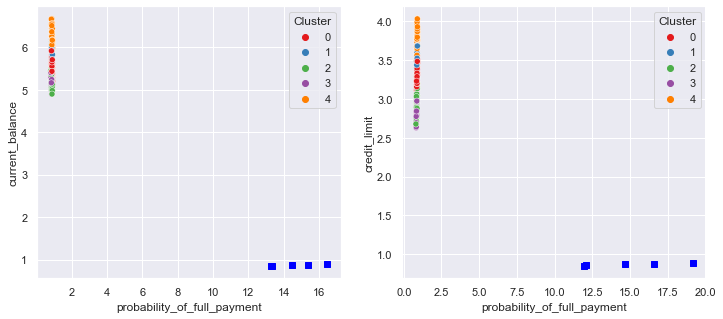

In [350]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot('probability_of_full_payment', 'current_balance', data=KM5_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('probability_of_full_payment', 'credit_limit', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

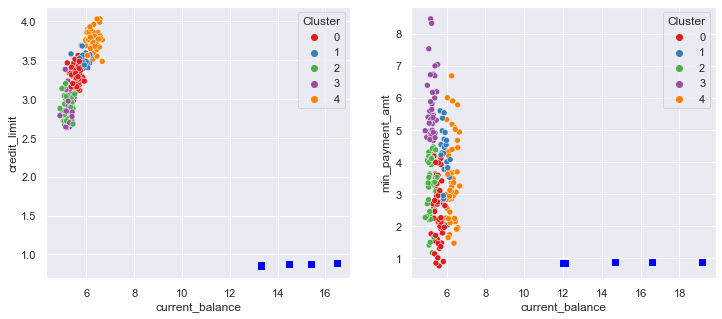

In [351]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot('current_balance', 'credit_limit', data=KM5_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('current_balance', 'min_payment_amt', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

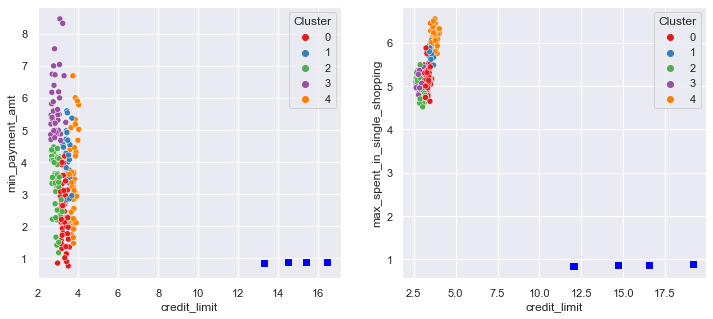

In [352]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot('credit_limit', 'min_payment_amt', data=KM5_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('credit_limit', 'max_spent_in_single_shopping', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

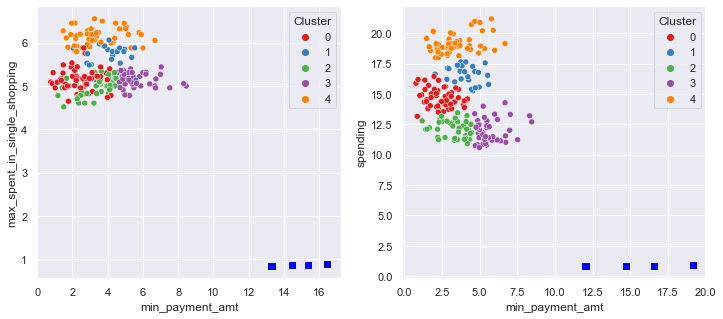

In [353]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot('min_payment_amt', 'max_spent_in_single_shopping', data=KM5_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('min_payment_amt', 'spending', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

In [294]:
# K-Means algorithm generated the following 5 clusters:

# clients with low spending (11-13) and low minimum payment amount (<5)
# clients with low spending (11-13) and lower-middle-level minimum payment amount (5-10)
# clients with lower-middle-level spending (13-16) and low payment amount (<5)
# clients with upper-middle-level spending (13-16) and lower-middle-level minimum payment amount (3-7)
# clients with top-level spending (18-25) and low to lower-middle-level minimum payment amount (1-7)

In [295]:
# Sizes of the clusters:

In [354]:
KM5_clust_sizes = KM5_clustered.groupby('Cluster').size().to_frame()
KM5_clust_sizes.columns = ["KM5_size"]
KM5_clust_sizes

KM5_size
Cluster          
0              51
1              25
2              44
3              42
4              48

In [355]:
# The biggest cluster is number 3 with 51 observations ("medium-medium" clients). 
# The smallest cluster is number 0 with 25 observations (low-spending clients). 
# Below there is a 3D projection of 5 generated clusters. 
# It is not very helpful in terms of a visualisation in a static mode but if you run the code in an interactive environment
# (e.g. Spyder) you can rotate it!

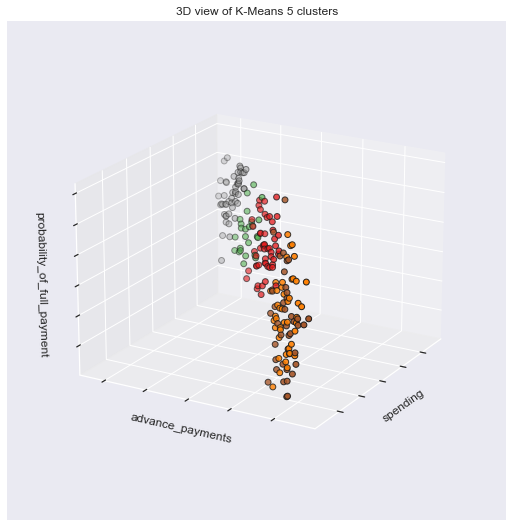

In [356]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig, rect=[0, 0, .99, 1], elev=20, azim=210)
ax.scatter(KM5_clustered['spending'],
           KM5_clustered['advance_payments'],
           KM5_clustered['probability_of_full_payment'],
           c=KM5_clustered['Cluster'],
           s=35, edgecolor='k', cmap=plt.cm.Set1)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('spending')
ax.set_ylabel('advance_payments')
ax.set_zlabel('probability_of_full_payment')
ax.set_title('3D view of K-Means 5 clusters')
ax.dist = 12

plt.show()

In [357]:
# Below a Plotly version:

In [300]:
!pip install plotly

In [504]:
from scipy.stats import zscore
df_std = data.apply(zscore)

In [505]:
KM_3_clusters = KMeans(n_clusters=3, init='k-means++').fit(df_std) # initialise and fit K-Means model

KM3_clustered = df_std.copy()
KM3_clustered.loc[:,'Cluster'] = KM_3_clusters.labels_ # append labels to points

In [506]:
import plotly as py
import plotly.graph_objs as go

def tracer(db, n, name):
    '''
    This function returns trace object for Plotly
    '''
    return go.Scatter3d(
        x = db[db['Cluster']==n]['spending'],
        y = db[db['Cluster']==n]['advance_payments'],
        z = db[db['Cluster']==n]['probability_of_full_payment'],
        mode = 'markers',
        name = name,
        marker = dict(
            size = 5
        )
     )

trace0 = tracer(KM5_clustered, 0, 'Cluster 0')
trace1 = tracer(KM5_clustered, 1, 'Cluster 1')
trace2 = tracer(KM5_clustered, 2, 'Cluster 2')

data = [trace0, trace1, trace2]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'spending'),
            yaxis = dict(title = 'advance_payments'),
            zaxis = dict(title = 'probability_of_full_payment')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [302]:
# 4 CLUSTERS

In [359]:
KM_4_clusters = KMeans(n_clusters=4, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM4_clustered = X_numerics.copy()
KM4_clustered.loc[:,'Cluster'] = KM_4_clusters.labels_ # append labels to points

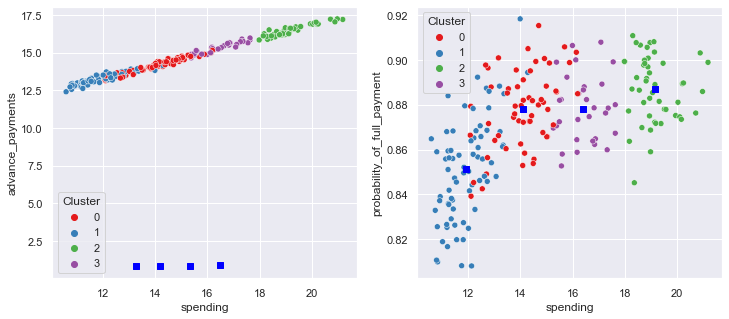

In [360]:
fig11, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot('spending', 'advance_payments', data=KM4_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('spending', 'probability_of_full_payment', data=KM4_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

# plotting centroids
axes[0].scatter(KM_4_clusters.cluster_centers_[:,1], KM_4_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_4_clusters.cluster_centers_[:,0], KM_4_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

In [305]:
# K-Means algorithm generated the following 4 clusters:

# Clients with low spending and and low to medium probability of full payment
# Clients with low-medium spending and low-medium probabiliity of full payment
# Clients with upper-medium spending and upper-medium probability of full payment
# clients with high spending and high probability of full payment

In [361]:
KM4_clust_sizes = KM4_clustered.groupby('Cluster').size().to_frame()
KM4_clust_sizes.columns = ["KM4_size"]
KM4_clust_sizes

KM4_size
Cluster          
0              59
1              72
2              48
3              31

In [362]:
# The biggest cluster is number 1 with 65 observations (low-medium" clients). 
# The smallest cluster is number 2 with 44 observations (upper-medium clients). 
# Below there is a 3D projection of 5 generated clusters. 
# It is not very helpful in terms of a visualisation in a static mode but if you run the code in an interactive environment 
# (e.g. Spyder) you can rotate it!

In [363]:
# Plotly interactive 3D plot

trace0 = tracer(KM4_clustered, 0, 'Cluster 0')
trace1 = tracer(KM4_clustered, 1, 'Cluster 1')
trace2 = tracer(KM4_clustered, 2, 'Cluster 2')
trace3 = tracer(KM4_clustered, 3, 'Cluster 3')

data = [trace0, trace1, trace2, trace3]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'spending'),
            yaxis = dict(title = 'advance_payments'),
            zaxis = dict(title = 'probability_of_full_payment')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [364]:
# DBSCAN

In [310]:
# To choose the best combination of the algorithm parameters I will first create a matrix of investigated combinations.

In [371]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import seaborn as sns
sns.set()

In [372]:
data=pd.read_csv("bank_marketing_part1_Data-1.csv")

In [373]:
from sklearn.preprocessing import StandardScaler

In [374]:
scaler = StandardScaler()
df_std = scaler.fit_transform(data)

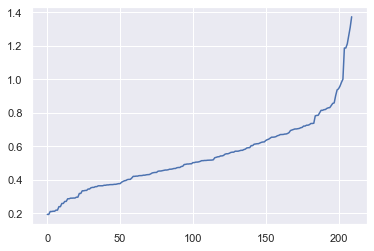

In [375]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_std)
distances, indices = nbrs.kneighbors(df_std)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [376]:
from sklearn import metrics
from sklearn.metrics import silhouette_score
siliuette_list_dbscan = []

for eps in np.arange(0.8,1,1.4):
    for min_sample in range(2,10):
        dbscan = DBSCAN(eps=eps, min_samples= min_sample)
        dbscan.fit(df_std)
        sil_score = metrics.silhouette_score(df_std, dbscan.labels_, metric='euclidean')
        siliuette_list_dbscan.append((eps, min_sample, sil_score, len(set(dbscan.labels_))) )
        
df_dbscan = pd.DataFrame(siliuette_list_dbscan, columns=['eps', 'min_samples', 'sil_score', 'number_of_clusters'])

In [377]:
df_dbscan.sort_values('sil_score', ascending=False).head()

eps  min_samples  sil_score  number_of_clusters
3  0.8            5   0.154762                   4
4  0.8            6   0.105124                   6
6  0.8            8   0.094084                   4
5  0.8            7   0.066645                   5
7  0.8            9   0.035325                   4

In [378]:
siliuette_list_dbscan = []

for eps in np.arange(0.8,1,1.4):
    for min_sample in range(1,6):
        dbscan = DBSCAN(eps=eps, min_samples=min_sample)
        dbscan.fit(df_std)
        sil_score = metrics.silhouette_score(df_std, dbscan.labels_, metric='euclidean')
        siliuette_list_dbscan.append((eps, min_sample, sil_score, len(set(dbscan.labels_))) )
df_dbscan = pd.DataFrame(siliuette_list_dbscan, columns=['eps', 'min_samples', 'sil_score', 'number_of_clusters'])

In [379]:
df_dbscan.sort_values('sil_score', ascending=False).tail()

eps  min_samples  sil_score  number_of_clusters
4  0.8            5   0.154762                   4
2  0.8            3   0.024672                   5
3  0.8            4  -0.019899                   6
1  0.8            2  -0.055738                  13
0  0.8            1  -0.186898                  34

In [380]:
DBS_clustering = DBSCAN(eps=0.8, min_samples=5).fit(X_numerics)

DBSCAN_clustered = X_numerics.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [381]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

DBSCAN_size
Cluster             
-1                45
 0                34
 1               118
 2                13

In [382]:
# DBSCAN created 3 clusters plus outliers cluster (-1). 
# Sizes of clusters 0-2 vary significantly - one has 13 observations, while another has 118. There are 45 outliers.

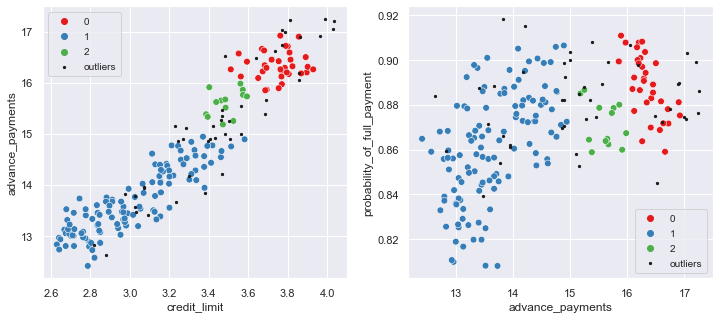

In [383]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))


sns.scatterplot('credit_limit', 'advance_payments',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot('advance_payments', 'probability_of_full_payment',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['credit_limit'], outliers['advance_payments'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['advance_payments'], outliers['probability_of_full_payment'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()

In [384]:
# The graph above shows that there are some outliers
# These points do not meet distance and minimum samples requirements to be recognised as a cluster.

In [385]:
clusters = DBS_clustering.labels_

In [386]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

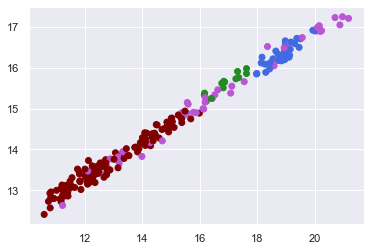

In [387]:
plt.scatter(X_numerics['spending'], X_numerics['advance_payments'], c=vectorizer(clusters));

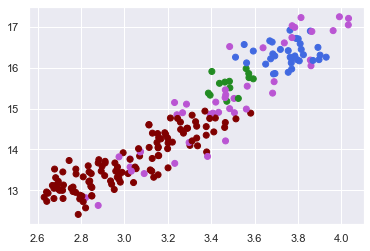

In [388]:
plt.scatter(X_numerics['credit_limit'], X_numerics['advance_payments'], c=vectorizer(clusters));

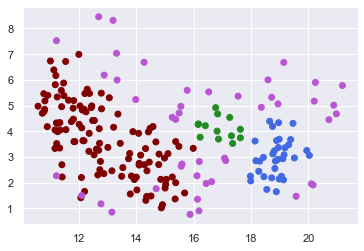

In [389]:
plt.scatter(X_numerics['spending'], X_numerics['min_payment_amt'], c=vectorizer(clusters));

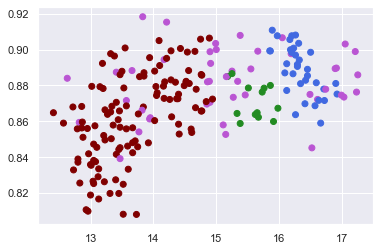

In [390]:
plt.scatter(X_numerics['advance_payments'], X_numerics['probability_of_full_payment'], c=vectorizer(clusters));

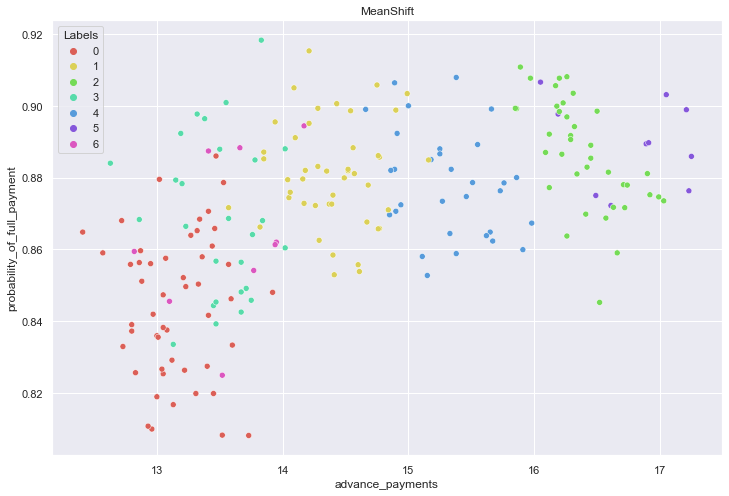

In [391]:
# Mean Shift
from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X_numerics, quantile=0.1)
ms = MeanShift(bandwidth).fit(X_numerics)

X_numerics['Labels'] = ms.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X_numerics['advance_payments'], X_numerics['probability_of_full_payment'], hue=X_numerics['Labels'], 
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]))
plt.plot()
plt.title('MeanShift')
plt.show()

In [392]:
MS_clustered = X_numerics.copy()
MS_clustered.loc[:,'Cluster'] = ms.labels_ # append labels to points

In [393]:
MS_clust_sizes = MS_clustered.groupby('Cluster').size().to_frame()
MS_clust_sizes.columns = ["MS_size"]
MS_clust_sizes

MS_size
Cluster         
0             50
1             45
2             38
3             27
4             31
5             10
6              9

In [394]:
# Agglomerative Clustering

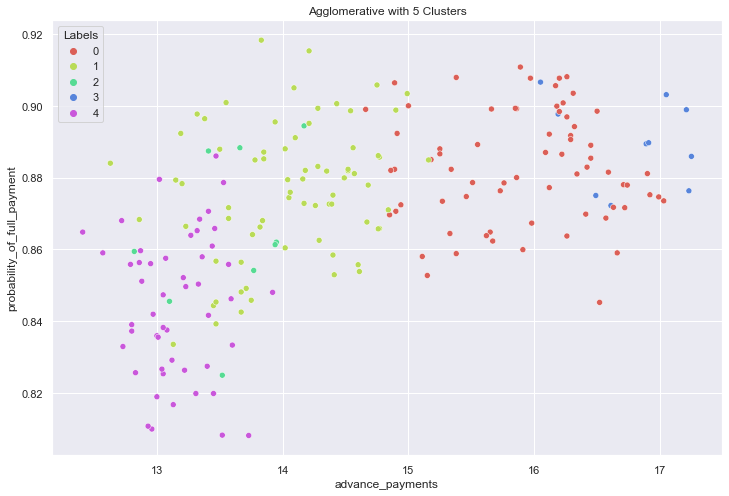

In [395]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X_numerics)

X_numerics['Labels'] = agglom.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X_numerics['advance_payments'], X_numerics['probability_of_full_payment'], hue=X_numerics['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('Agglomerative with 5 Clusters')
plt.show()

In [396]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

dist = distance_matrix(X_numerics, X_numerics)
print(dist)

[[0.         4.84379711 1.26000488 ... 7.08147996 4.63461196 4.8895951 ]
 [4.84379711 0.         3.59516985 ... 2.85790382 1.17640255 1.30574679]
 [1.26000488 3.59516985 0.         ... 5.94293167 3.4773039  3.74469185]
 ...
 [7.08147996 2.85790382 5.94293167 ... 0.         2.59410604 2.49167827]
 [4.63461196 1.17640255 3.4773039  ... 2.59410604 0.         0.87365342]
 [4.8895951  1.30574679 3.74469185 ... 2.49167827 0.87365342 0.        ]]


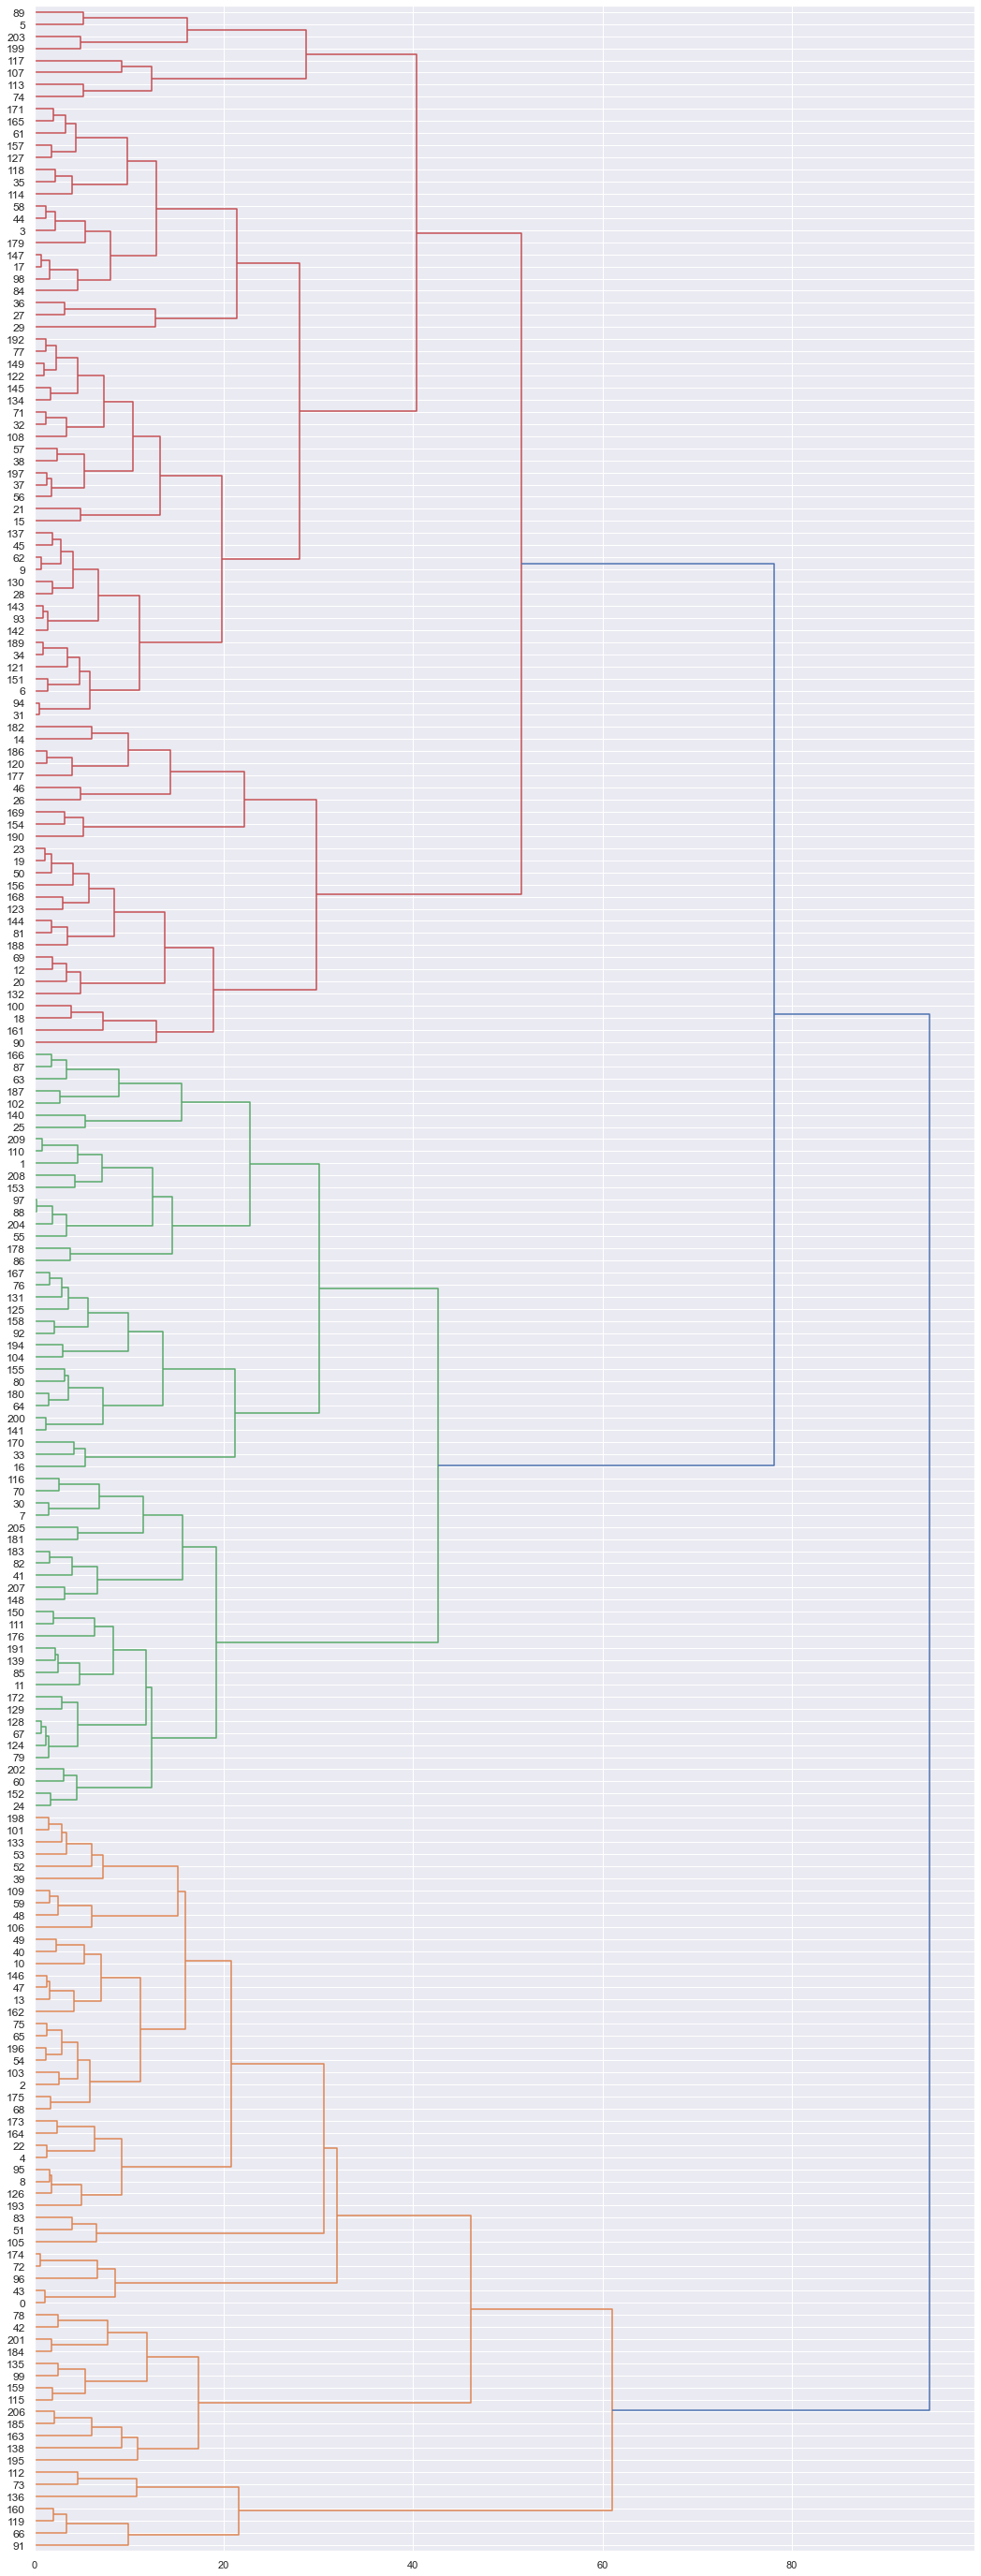

In [397]:
Z = hierarchy.linkage(dist, 'complete')
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

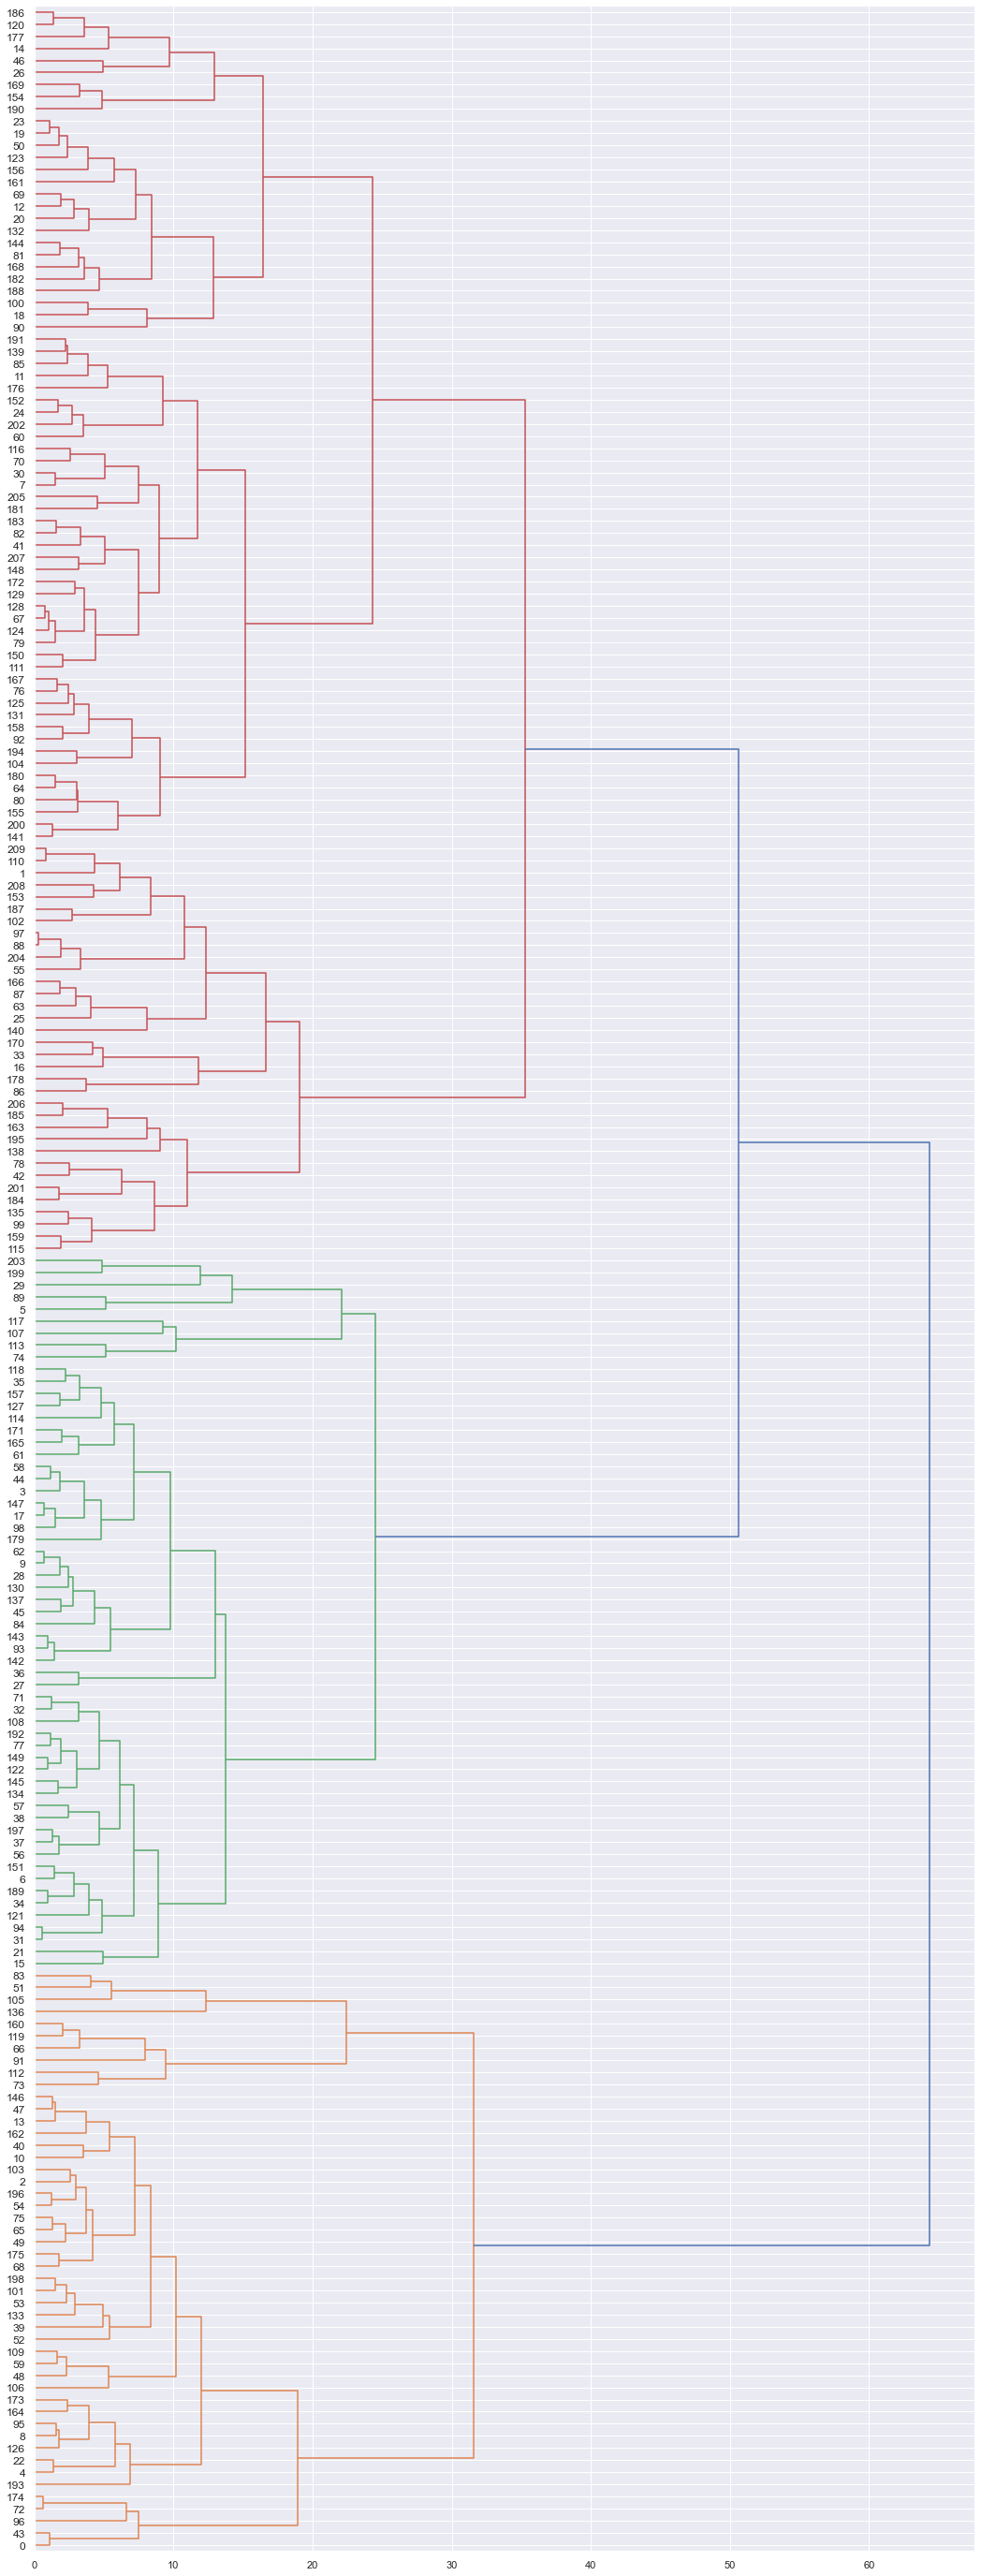

In [398]:
Z = hierarchy.linkage(dist, 'average')
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [399]:
Agg_clustered =X_numerics.copy()
Agg_clustered.loc[:,'Cluster'] = agglom.labels_ # append labels to points

In [400]:
Agg_clust_sizes = Agg_clustered.groupby('Cluster').size().to_frame()
Agg_clust_sizes.columns = ["Agg_size"]
Agg_clust_sizes

Agg_size
Cluster          
0              69
1              72
2               9
3              10
4              50

In [401]:
# Looking into the cluster sizes across all the algorithms

In [402]:
clusters = pd.concat([KM5_clust_sizes, KM4_clust_sizes, DBSCAN_clust_sizes, MS_clust_sizes, Agg_clust_sizes],axis=1, sort=False)
clusters

KM5_size  KM4_size  DBSCAN_size  MS_size  Agg_size
Cluster                                                    
-1            NaN       NaN         45.0      NaN       NaN
 0           51.0      59.0         34.0     50.0      69.0
 1           25.0      72.0        118.0     45.0      72.0
 2           44.0      48.0         13.0     38.0       9.0
 3           42.0      31.0          NaN     27.0      10.0
 4           48.0       NaN          NaN     31.0      50.0
 5            NaN       NaN          NaN     10.0       NaN
 6            NaN       NaN          NaN      9.0       NaN

In [160]:
# Conclusion:¶
# It seems KMeans with 4 clusters has more evenly balanced observations. 
# DBSCAN on the other hand though was able to identify the outliers perfectly, it did not perform well
# as it failed in recognising clusters of various densities (which are present in this case). 
# Another reason for DBSCAN's not performing well is size of the data
# DBSCAN is known to work great when the size of the data is large.
# The performance with KMeans with 5 clusters and MeanShift were almost similar.
# Agglomerative algorithm came out with unbalanced clustering

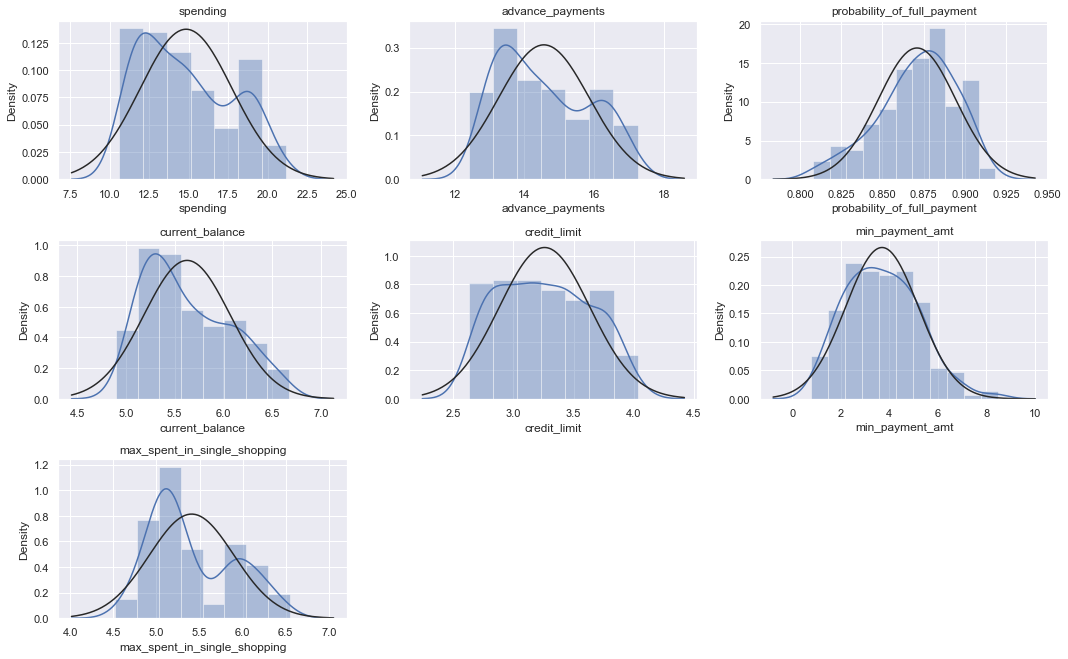

In [403]:
#A quick check on vriables

from scipy.stats import norm 

graph_by_variables = ['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping']
plt.figure(figsize=(15,18))

for i in range(0,7):
    plt.subplot(6,3,i+1)
    sns.distplot(df[graph_by_variables[i]].dropna(),fit=norm)
    plt.title(graph_by_variables[i])

plt.tight_layout()

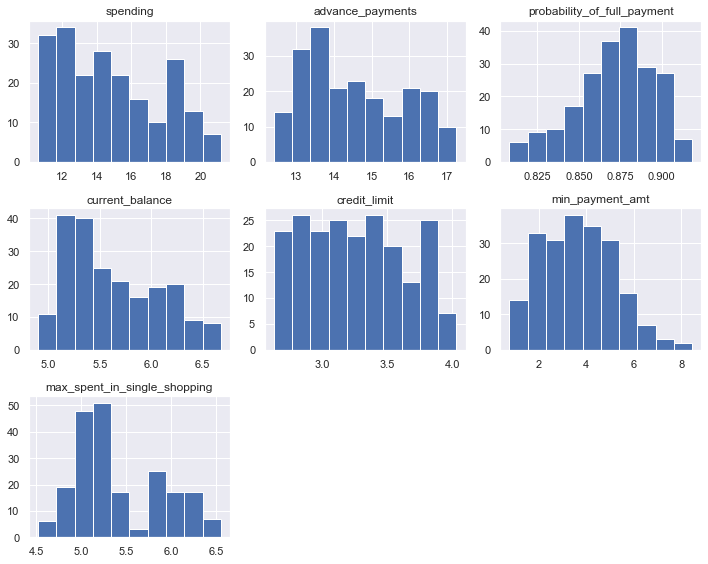

In [404]:
#Frequency variables in charts

data[['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping']].hist(figsize=(10,8))
plt.tight_layout()

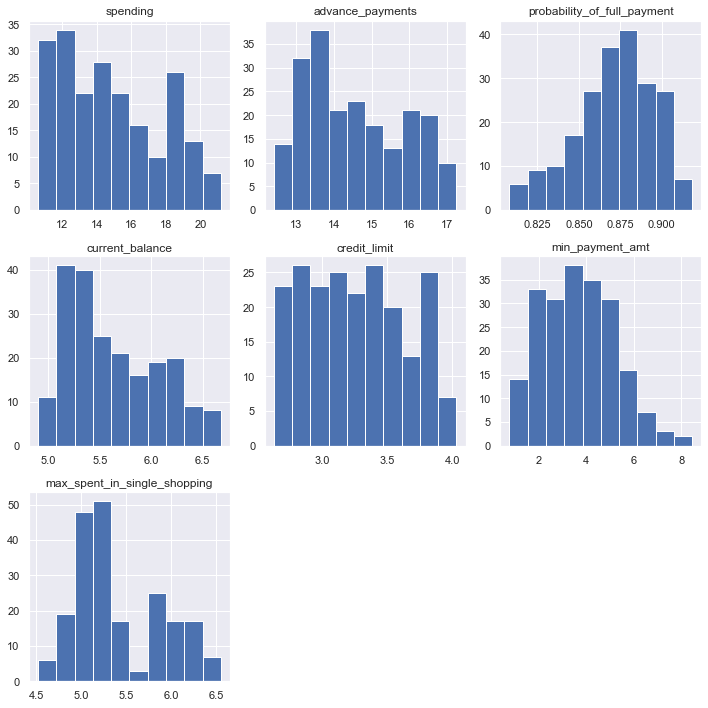

In [405]:
data[['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping']].hist(figsize=(10,10))

plt.tight_layout()

Text(0, 0.5, 'probability_of_full_payment')

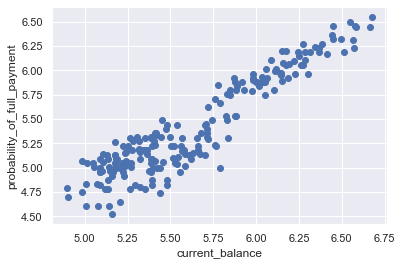

In [406]:
plt.scatter(data['current_balance'], data['max_spent_in_single_shopping'])
plt.xlabel('current_balance')
plt.ylabel('probability_of_full_payment')

<AxesSubplot:title={'center':'Spending'}, ylabel='Density'>

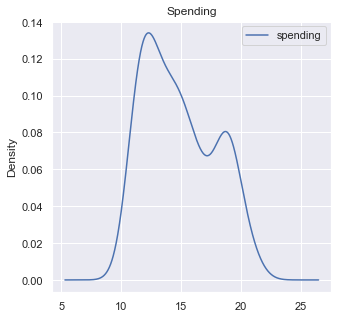

In [407]:
data[['spending']].plot.kde(figsize=(5,5),title='Spending')

Text(0.5, 1.0, 'Correlation Matrix')

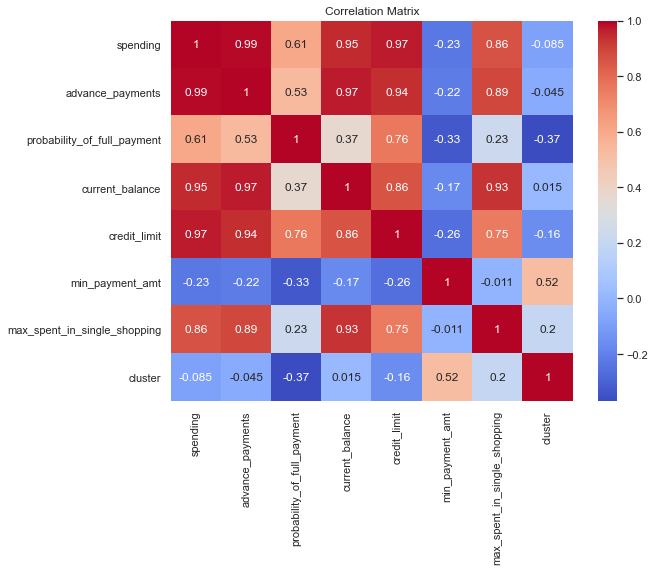

In [408]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),cmap='coolwarm', annot=True)

plt.title('Correlation Matrix')

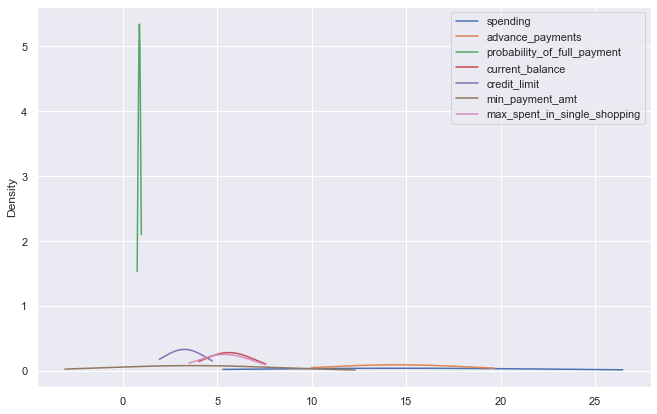

In [409]:
ax = df[['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping']].plot.kde(figsize=(11,7), bw_method=3) #,ind=[0, 2, 3,4]

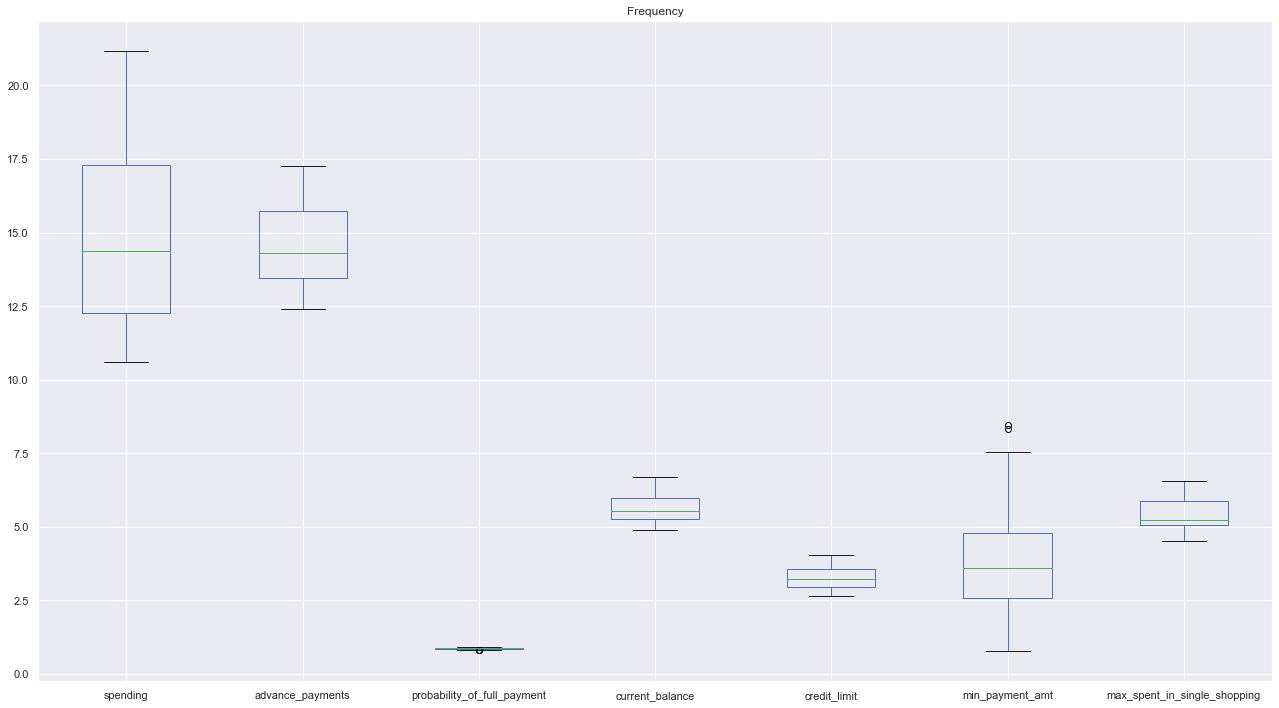

In [410]:
df[['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping']].plot.box(figsize=(18,10),title='Frequency',legend=True);
plt.tight_layout()
#tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area

In [411]:
# Hierarchical Clustering

In [412]:
siliuette_list_hierarchical = []

for cluster in range(2,20,2):
    for linkage_method in ['ward', 'average', 'complete']:
        agglomerative = AgglomerativeClustering(linkage=linkage_method, affinity='euclidean',n_clusters=cluster).fit_predict(df_std)
        sil_score = metrics.silhouette_score(df_std, agglomerative, metric='euclidean')
        siliuette_list_hierarchical.append((cluster, sil_score, linkage_method, len(set(agglomerative)) ) )
        
df_hierarchical = pd.DataFrame(siliuette_list_hierarchical, columns=['cluster', 'sil_score','linkage_method', 'number_of_clusters'])

In [413]:
df_hierarchical.sort_values('sil_score', ascending=False)

cluster  sil_score linkage_method  number_of_clusters
0         2   0.461297           ward                   2
2         2   0.451995       complete                   2
1         2   0.441339        average                   2
4         4   0.354864        average                   4
5         4   0.314857       complete                   4
3         4   0.300576           ward                   4
7         6   0.290306        average                   6
10        8   0.270292        average                   8
13       10   0.257456        average                  10
21       16   0.233632           ward                  16
9         8   0.232726           ward                   8
18       14   0.231217           ward                  14
15       12   0.228451           ward                  12
19       14   0.227140        average                  14
12       10   0.221841           ward                  10
24       18   0.221276           ward                  18
8         6   0.217380       complete                   6
17       12   0.215782       complete                  12
6         6   0.214959           ward                   6
20       14   0.209332       complete                  14
23       16   0.207960       complete                  16
22       16   0.205609        average                  16
25       18   0.203550        average                  18
16       12   0.200643        average                  12
26       18   0.197487       complete                  18
14       10   0.180936       complete                  10
11        8   0.157426       complete                   8

In [414]:
#Spectral clustering

# Normalizing the Data
from sklearn.preprocessing import StandardScaler, normalize
df_nor = normalize(df_std)

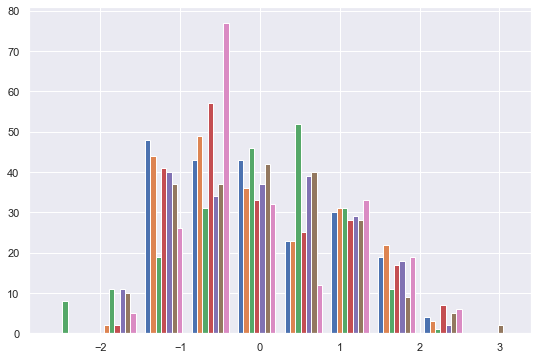

In [415]:
plt.figure(figsize=(9,6))
plt.hist(df_std)
plt.show()

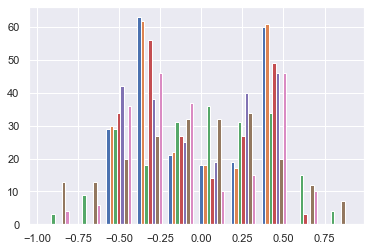

In [416]:
plt.hist(df_nor)
plt.show()

In [184]:
# Checking Spectral Values in Different 'n_neighbours' and 'Clusters'

In [417]:
from sklearn.mixture import GaussianMixture

from sklearn import cluster 
from sklearn.cluster import SpectralClustering

silhouette_list_spectral= []

for cluster in range(2,10):
    for neighbours in np.arange (3,10,2):
        spectral = SpectralClustering(n_clusters=cluster, affinity="nearest_neighbors",n_neighbors=neighbours, assign_labels='discretize',
                                      random_state=40).fit_predict(df_std)
        sil_score = metrics.silhouette_score(df_std,spectral, metric='euclidean')
        silhouette_list_spectral.append((cluster,sil_score, neighbours))

    
df_spectral= pd.DataFrame(silhouette_list_spectral, columns=['cluster', 'sil_score', 'neighbours'] )

In [418]:
df_spectral.sort_values('sil_score', ascending= False)

cluster  sil_score  neighbours
2         2   0.467588           7
1         2   0.467070           5
3         2   0.463522           9
6         3   0.402963           7
7         3   0.401374           9
5         3   0.398362           5
11        4   0.328155           9
10        4   0.318363           7
9         4   0.287464           5
15        5   0.273344           9
13        5   0.266263           5
14        5   0.264784           7
17        6   0.259643           5
27        8   0.259530           9
26        8   0.258283           7
19        6   0.253592           9
18        6   0.250727           7
22        7   0.250046           7
23        7   0.247708           9
30        9   0.245995           7
21        7   0.245394           5
29        9   0.241939           5
31        9   0.240057           9
25        8   0.237875           5
16        6   0.165972           3
20        7   0.094482           3
24        8   0.083137           3
0         2   0.054436           3
28        9   0.045219           3
12        5   0.007046           3
4         3  -0.043351           3
8         4  -0.134444           3

In [189]:
# 3, 5, 7, and 9 n_neighbours models give the highest Silhouette scores in 9 number of clusters. I chose the 5 n_neighbour model.

In [ ]:
# GMM

In [419]:
siliuette_list_GMM = []

for cluster in range(2,21,2):
    for covariance_type in ['full', 'tied', 'diag', 'spherical']:
        gmm  = GaussianMixture(n_components = cluster,covariance_type = covariance_type, random_state = 40).fit_predict(df_std)
        sil_score = metrics.silhouette_score(df_std, gmm, metric='euclidean')
        siliuette_list_GMM.append((cluster, sil_score, covariance_type, len(set(gmm)) ) )
        
df_gmm = pd.DataFrame(siliuette_list_GMM, columns=['cluster', 'sil_score','covariance_type', 'number_of_clusters'])

In [420]:
df_gmm.sort_values('sil_score', ascending=False).tail()

cluster  sil_score covariance_type  number_of_clusters
17       10   0.102861            tied                  10
21       12   0.102078            tied                  12
25       14   0.059956            tied                  14
37       20   0.049778            tied                  20
33       18   0.042025            tied                  18

In [421]:
#  Spherical covariance type worked better in the model in 10 clusters.

In [193]:
# Compering Results for the Optimal Number of Cluster Model

In [422]:
kmeans_      = KMeans(n_clusters=4, random_state=40).fit_predict(df_std)

In [423]:
gmm_         = GaussianMixture(n_components=10, covariance_type='spherical', random_state=40).fit_predict(df_std)

In [424]:
hierarchical_= AgglomerativeClustering(linkage='average', affinity='euclidean', n_clusters=5).fit_predict(df_std)

In [425]:
spectral_    = SpectralClustering(n_clusters=9, affinity="rbf", n_neighbors=7, assign_labels='discretize',
                                  random_state=40).fit_predict(df_nor)

In [426]:
dbscan       = DBSCAN(eps=0.8, min_samples=5).fit_predict(df_std)

In [427]:
kmeansSilhouette_Score        = metrics.silhouette_score(df_std, kmeans_, metric='euclidean')
GMM_Silhouette_Score          = metrics.silhouette_score(df_std, gmm_, metric='euclidean')
DBSCAN_Silhouette_Score       = metrics.silhouette_score(df_std, dbscan, metric='euclidean')
Hierarchical_Silhouette_Score = metrics.silhouette_score(df_std, hierarchical_, metric='euclidean')
Spectral_Silhouette_Score     = metrics.silhouette_score(df_std, spectral_, metric='euclidean')

In [428]:
Clustering_Silhouette_Scores  = [ ['KMeans',kmeansSilhouette_Score ], ['GMM', GMM_Silhouette_Score],
                                ['Hierarchical',Hierarchical_Silhouette_Score ], ['Spectral', Spectral_Silhouette_Score],
                                ['DBSCAN', DBSCAN_Silhouette_Score]]

Clustering_Silhouette_Scores  = pd.DataFrame(Clustering_Silhouette_Scores, columns=['Clustering Method', 'Silhouette Score']) 
Clustering_Silhouette_Scores.sort_values(by='Silhouette Score', ascending= False)

Clustering Method  Silhouette Score
0            KMeans          0.334485
2      Hierarchical          0.275231
1               GMM          0.233004
3          Spectral          0.164301
4            DBSCAN          0.154762

In [204]:
# Hierarchical Method Chart

In [429]:
data['cluster'] = hierarchical_ 

In [430]:
data['cluster'].value_counts()

0    74
2    70
3    55
1    10
4     1
Name: cluster, dtype: int64

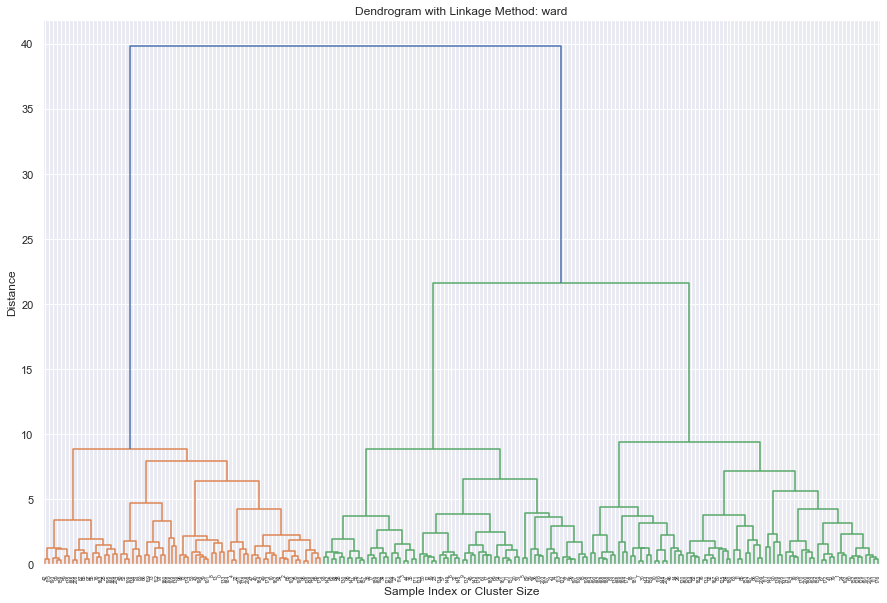

In [431]:
plt.figure(figsize=(15,10)) 
plt.title("Dendrogram with Linkage Method: ward") 
plt.xlabel('Sample Index or Cluster Size') 
plt.ylabel('Distance') 
          

dendrogram(linkage(df_std, method='ward')) 
plt.show() 

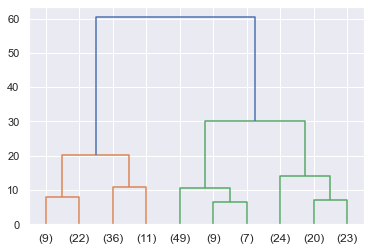

In [432]:
wardlink = linkage(data, method = 'ward')
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [433]:
data['cluster'] = dbscan

In [434]:
data['cluster'].value_counts()

 1    107
-1     59
 0     29
 2     15
Name: cluster, dtype: int64

In [215]:
# DIMENSION REDUCTION PCA

In [435]:
#Following up with this model, I added the clusters to the dataframe by following command.

kmeans_       = KMeans(n_clusters=4, random_state=40).fit(df_std)

df['cluster'] = kmeans_.labels_

In [436]:
# Normalizing the Data 
df_nor = normalize(df_std) 


# View the new feature data's shape 
df_nor.shape 

(210, 7)

In [222]:
!pip install umap

  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3564 sha256=ce85f1210ebe50cc0b98db030bb9b540c360d69798bf64ec5749943bd8664e06
  Stored in directory: c:\users\aditya rishi\appdata\local\pip\cache\wheels\d4\13\91\2e752dc8dab5df027854bd33d2b65e1dc5cdc107fd1133990f
Successfully built umap


In [437]:
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
import umap

# PCA 2 dimensions

pca = PCA(n_components=2).fit(df_nor)

df_pca2 = pca.fit_transform(df_nor)
print("original shape:   ", df_nor.shape)
print("transformed shape:", df_pca2.shape)

original shape:    (210, 7)
transformed shape: (210, 2)


In [438]:
#Result in a DataFrame

df_pca = pd.DataFrame(df_pca2) 
df_pca.columns = ['A1', 'A2']
df_pca.head()

A1        A2
0  1.003722 -0.290039
1  0.358782  0.594688
2  1.044666 -0.180933
3 -0.773857 -0.547762
4  0.964621  0.310260

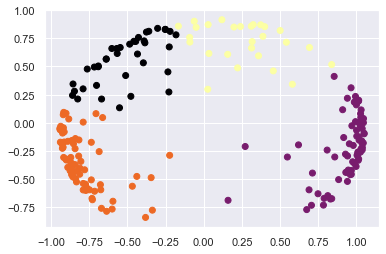

In [439]:
plt.scatter(df_pca['A1'], df_pca['A2'],
            c = KMeans(n_clusters=4, random_state=40).fit_predict(df_pca2), cmap ="inferno") 
plt.show()

In [440]:
print(pca.explained_variance_)

[0.60236316 0.23851391]


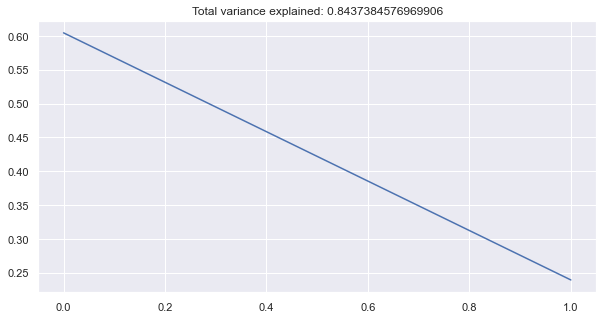

In [441]:
plt.figure(figsize = (10,5))
plt.plot(pca.explained_variance_ratio_)
plt.title('Total variance explained: {}'.format(pca.explained_variance_ratio_.sum()))
plt.show()

In [442]:
# PCA 3 dimension

pca = PCA(n_components=3).fit(df_nor)

df_pca3 = pca.fit_transform(df_nor)
print("original shape:   ", df_nor.shape)
print("transformed shape:", df_pca2.shape)

original shape:    (210, 7)
transformed shape: (210, 2)


In [443]:
df_pca3 = pd.DataFrame(df_pca3) 
df_pca3.columns = ['A1', 'A2', 'A3']
df_pca3.head()

A1        A2        A3
0  1.003722 -0.290039  0.202255
1  0.358782  0.594688 -0.638282
2  1.044666 -0.180933  0.068154
3 -0.773857 -0.547762  0.290216
4  0.964621  0.310260  0.007650

In [444]:
df_pca3.columns = ['A1', 'A2','A3'] 

In [445]:
fig = px.scatter_3d(df_pca3, x=df_pca3['A1'], y= df_pca3['A2'], z=df_pca3['A3'], color=df['cluster']) 

fig.show()

<IPython.core.display.Javascript object>

In [446]:
print(pca.explained_variance_)

[0.60236316 0.23851391 0.12665897]


In [447]:
# If we would like to use PCA dimension reduction, PCA in 2 or 3 dimensions gives a similar score of explained variance.

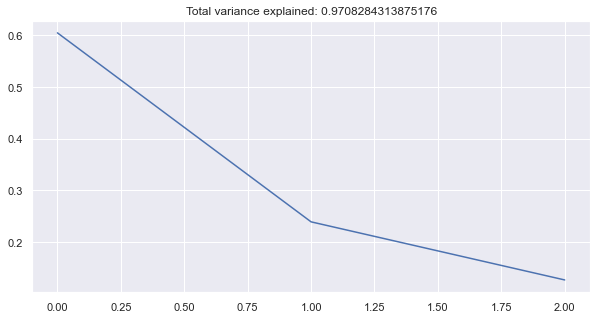

In [448]:
plt.figure(figsize = (10,5))
plt.plot(pca.explained_variance_ratio_)
plt.title('Total variance explained: {}'.format(pca.explained_variance_ratio_.sum()))
plt.show()

In [449]:
 # T-SNE

In [450]:
# Setting T-SNE 2 Dimensions

In [451]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
df_tsne2 = tsne.fit_transform(df_nor)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 210 samples in 0.000s...
[t-SNE] Computed neighbors for 210 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 210 / 210
[t-SNE] Mean sigma: 0.376205
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.047737
[t-SNE] KL divergence after 300 iterations: 0.198328


In [452]:
#df_tsne2.tolist()

In [453]:
# Store results of T-SNE in a data frame
result =  pd.DataFrame(df_tsne2, columns=['TSNE%i' % i for i in range(2)])

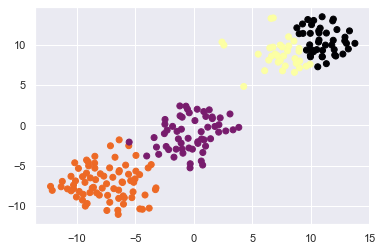

In [454]:
plt.scatter(result['TSNE0'], result['TSNE1'],
            c  = KMeans(n_clusters=4, random_state=40).fit_predict(df_tsne2), cmap ="inferno") 
plt.show()

In [474]:
# Understanding Clusters by Customer Segmentation
# 10.1 Kmeans Model with 8 Clusters

In [480]:
kmeans4 = KMeans(n_clusters=4, random_state=40).fit(df_std)
data['cluster'] = kmeans4.labels_

In [481]:
kmeans4.labels_

array([1, 0, 1, 2, 1, 2, 2, 0, 1, 2, 1, 3, 2, 1, 0, 2, 0, 2, 0, 2, 2, 2,
       1, 2, 0, 3, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 0, 3, 1,
       2, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 3, 2, 2, 2, 1, 0, 2, 2, 3, 0, 1,
       1, 0, 1, 0, 0, 2, 1, 1, 2, 1, 0, 2, 3, 0, 0, 0, 0, 1, 2, 3, 3, 3,
       3, 2, 0, 1, 0, 2, 0, 1, 1, 3, 2, 3, 0, 1, 3, 1, 0, 1, 1, 2, 0, 1,
       3, 0, 1, 2, 2, 3, 0, 3, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0,
       0, 1, 2, 1, 1, 2, 3, 0, 3, 0, 2, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 3,
       0, 0, 0, 2, 0, 1, 1, 2, 1, 3, 1, 2, 3, 0, 0, 2, 0, 2, 0, 1, 1, 1,
       0, 0, 3, 2, 0, 0, 0, 0, 3, 3, 0, 3, 0, 2, 0, 0, 2, 1, 0, 3, 1, 2,
       1, 2, 0, 3, 0, 2, 3, 0, 3, 0, 3, 3])

In [482]:
data['cluster']

0      1
1      0
2      1
3      2
4      1
5      2
6      2
7      0
8      1
9      2
10     1
11     3
12     2
13     1
14     0
15     2
16     0
17     2
18     0
19     2
20     2
21     2
22     1
23     2
24     0
25     3
26     0
27     2
28     2
29     2
30     0
31     2
32     2
33     0
34     2
35     2
36     2
37     2
38     2
39     1
40     1
41     0
42     3
43     1
44     2
45     2
46     0
47     1
48     1
49     1
50     2
51     1
52     1
53     1
54     1
55     3
56     2
57     2
58     2
59     1
60     0
61     2
62     2
63     3
64     0
65     1
66     1
67     0
68     1
69     0
70     0
71     2
72     1
73     1
74     2
75     1
76     0
77     2
78     3
79     0
80     0
81     0
82     0
83     1
84     2
85     3
86     3
87     3
88     3
89     2
90     0
91     1
92     0
93     2
94     0
95     1
96     1
97     3
98     2
99     3
100    0
101    1
102    3
103    1
104    0
105    1
106    1
107    2
108    0
109    1
110    3
1

In [483]:
kmeans4

KMeans(n_clusters=4, random_state=40)

In [484]:
kmeans4_

KMeans(n_clusters=4, random_state=40)

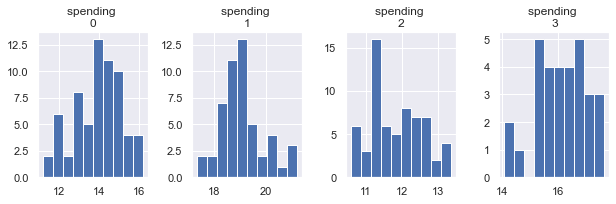

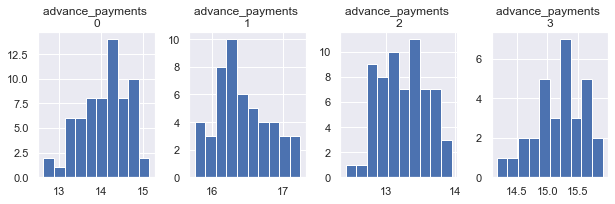

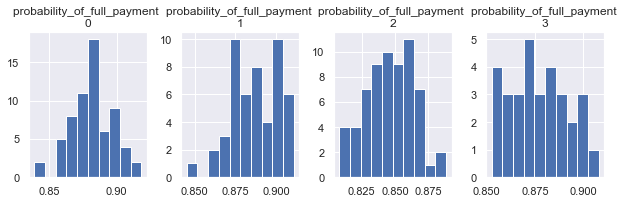

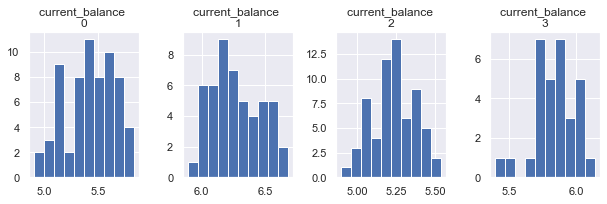

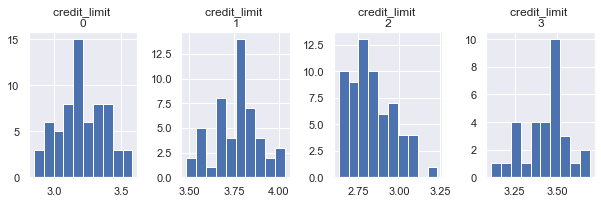

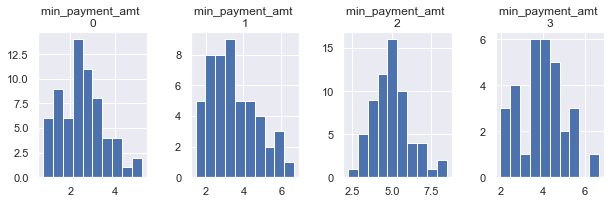

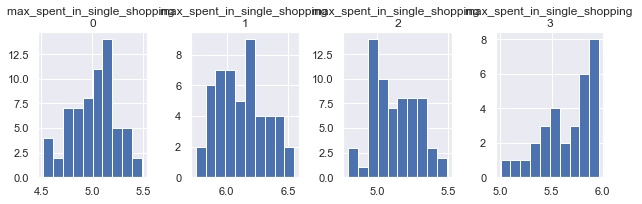

In [489]:
col_list= ['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping']


for column in col_list:
    plt.figure(figsize=(15,3))
    for i in range(0,4):
        plt.subplot(1,7,i+1)
        cluster = data[data['cluster']==i]
        cluster[column].hist()
        plt.title('{} \n{}'.format(column, i))
        
    plt.tight_layout()
    plt.show()

Text(0, 0.5, 'ADVANCE PAYMENTS')

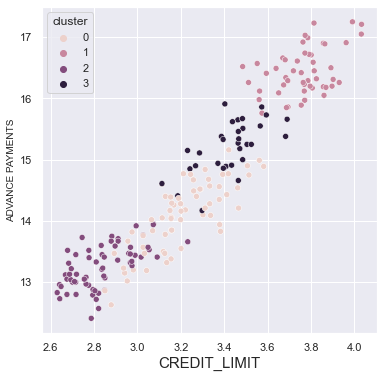

In [491]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='credit_limit', y='advance_payments', hue='cluster',data=data);
plt.xlabel('CREDIT_LIMIT',size=15)
#plt.xlim([0,40000])
plt.ylabel('ADVANCE PAYMENTS', size =10)

<Figure size 1800x1800 with 0 Axes>

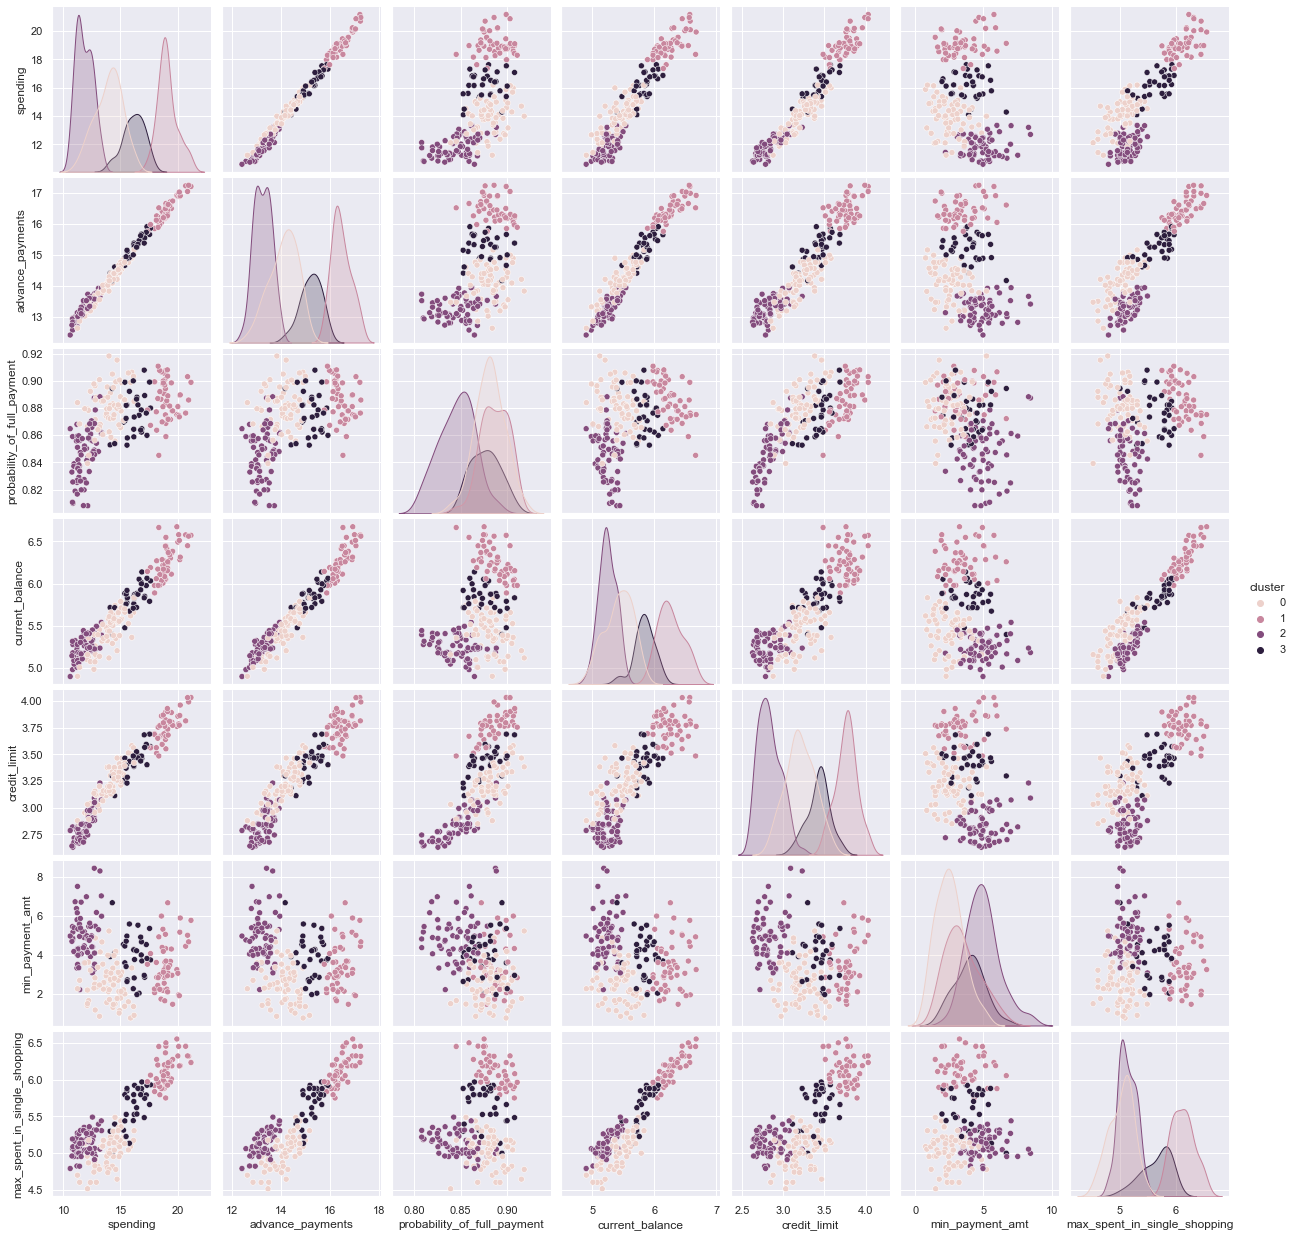

In [492]:
best_columns = ['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping']

best_columns.append("cluster")
plt.figure(figsize=(25,25))
sns.pairplot( data[best_columns], hue="cluster")

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


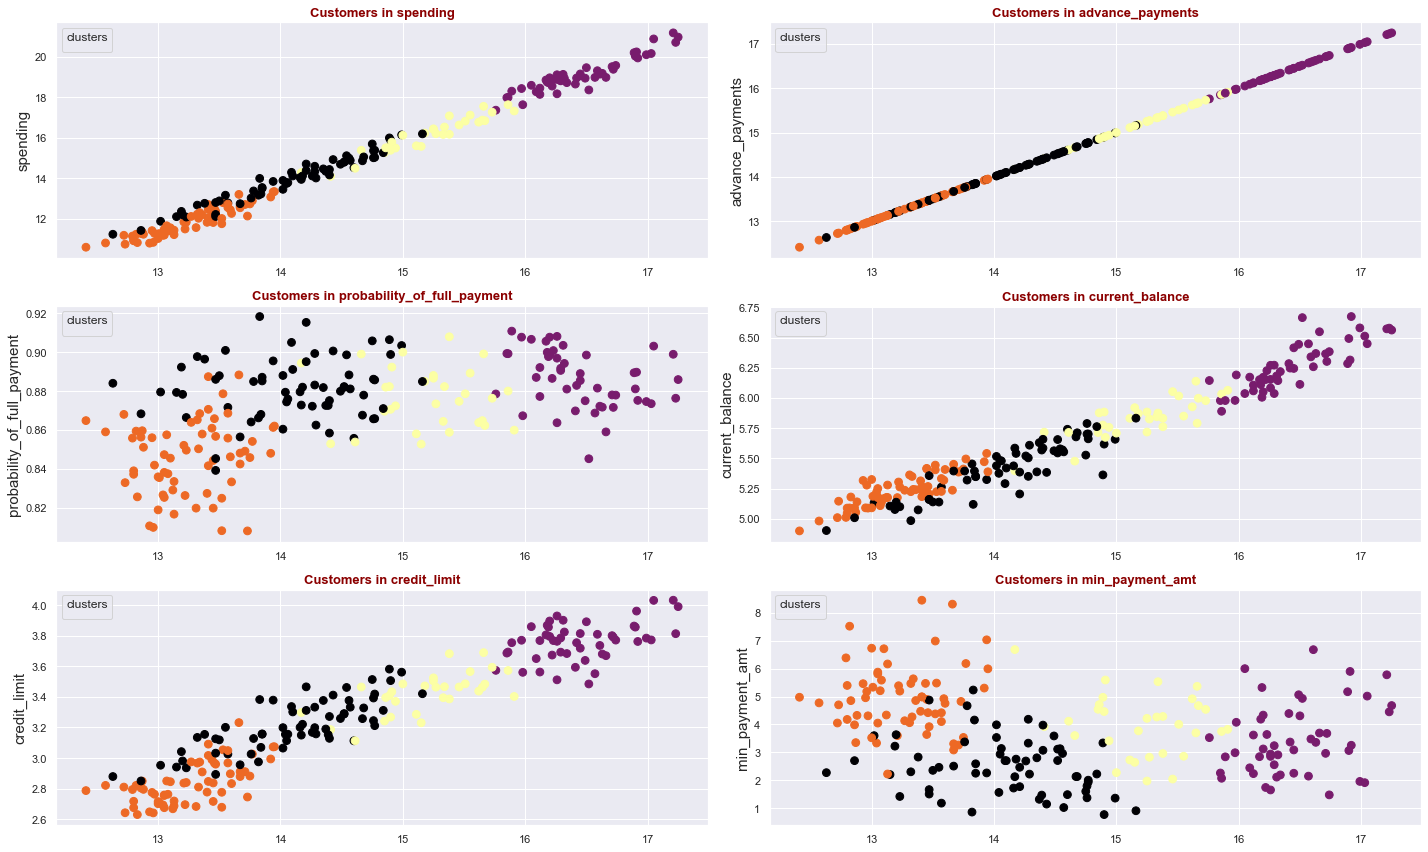

In [497]:
fig, axes = plt.subplots(3,2,figsize=(20,12))
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 14 }

for i in range(0,6):
    
    plt.subplot(3, 2, i+1)
    plt.scatter(data['advance_payments'], data[best_columns[i]], c= data['cluster'], s=60, cmap='inferno')
    legend = plt.legend(loc="upper left", title="clusters")
    plt.title('Customers in '+ str(best_columns[i]), fontdict=title_font, fontsize=13)
    #plt.xlabel('customer_behaviours',size=15)
    plt.ylabel(str(best_columns[i]),size=15)
    

plt.tight_layout()
plt.show()

In [498]:
# Large Payments are done by a small group with expensive purchases and a credit limit that is between average and high.
# Small group of people have a higher amount of Cash Advance* especially after payments of 30.000. Large group of people have a lower cash limit contrats large payments.
# *Credit Limit is very low on a large group of customers with little purchases.

In [ ]:
# Kmeans Model with 4 Clusters

In [499]:
kmeans4_  = KMeans(n_clusters=4, random_state=40).fit(df_std)
df['cluster'] = kmeans4_.labels_

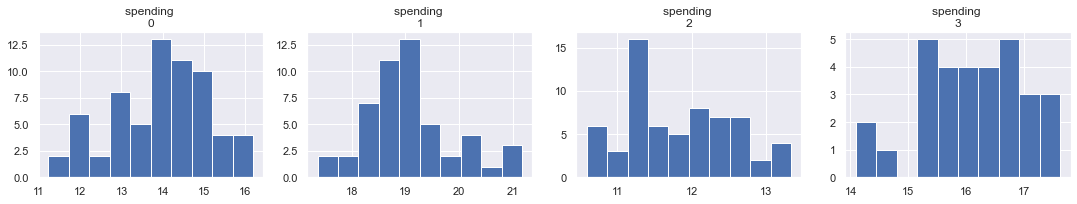

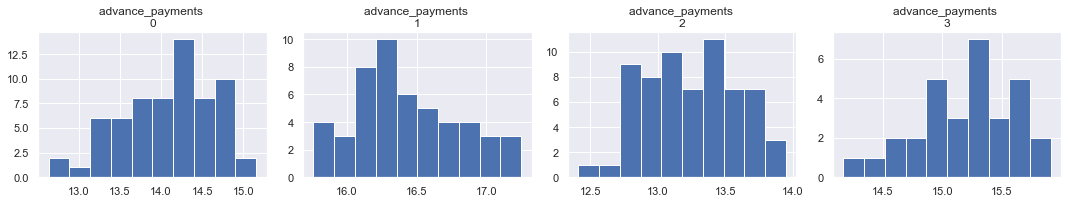

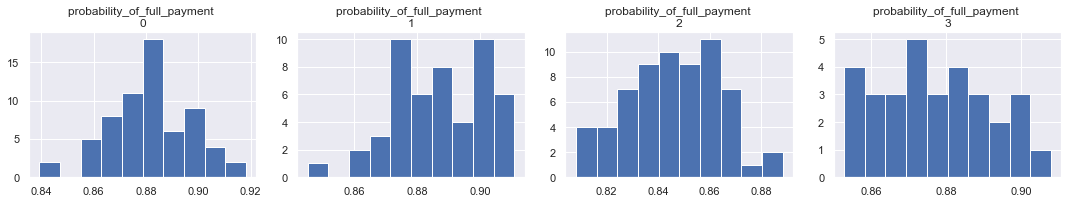

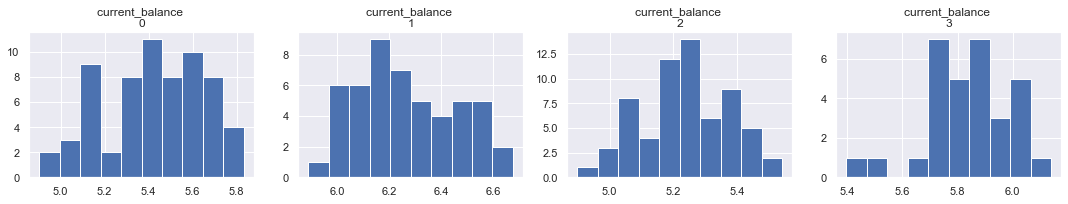

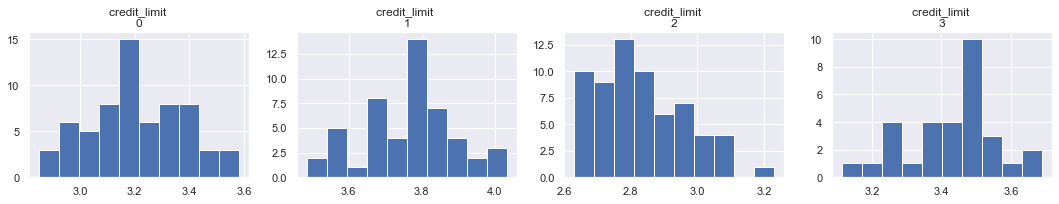

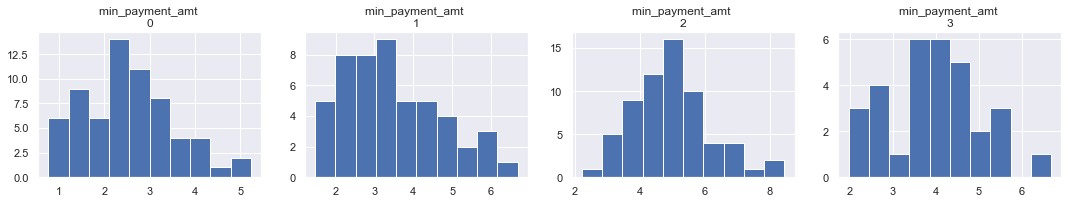

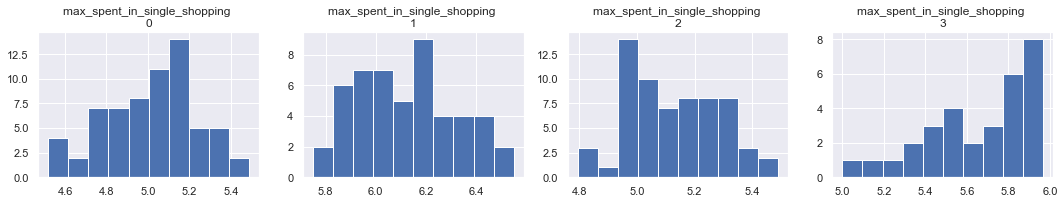

In [500]:
col_list= ['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping']


for column in col_list:
    plt.figure(figsize=(15,3))
    for i in range(0,4):
        plt.subplot(1,4,i+1)
        cluster = df[df['cluster']==i]
        cluster[column].hist()
        plt.title('{} \n{}'.format(column, i))
        
    plt.tight_layout()
    plt.show()

<Figure size 1800x1800 with 0 Axes>

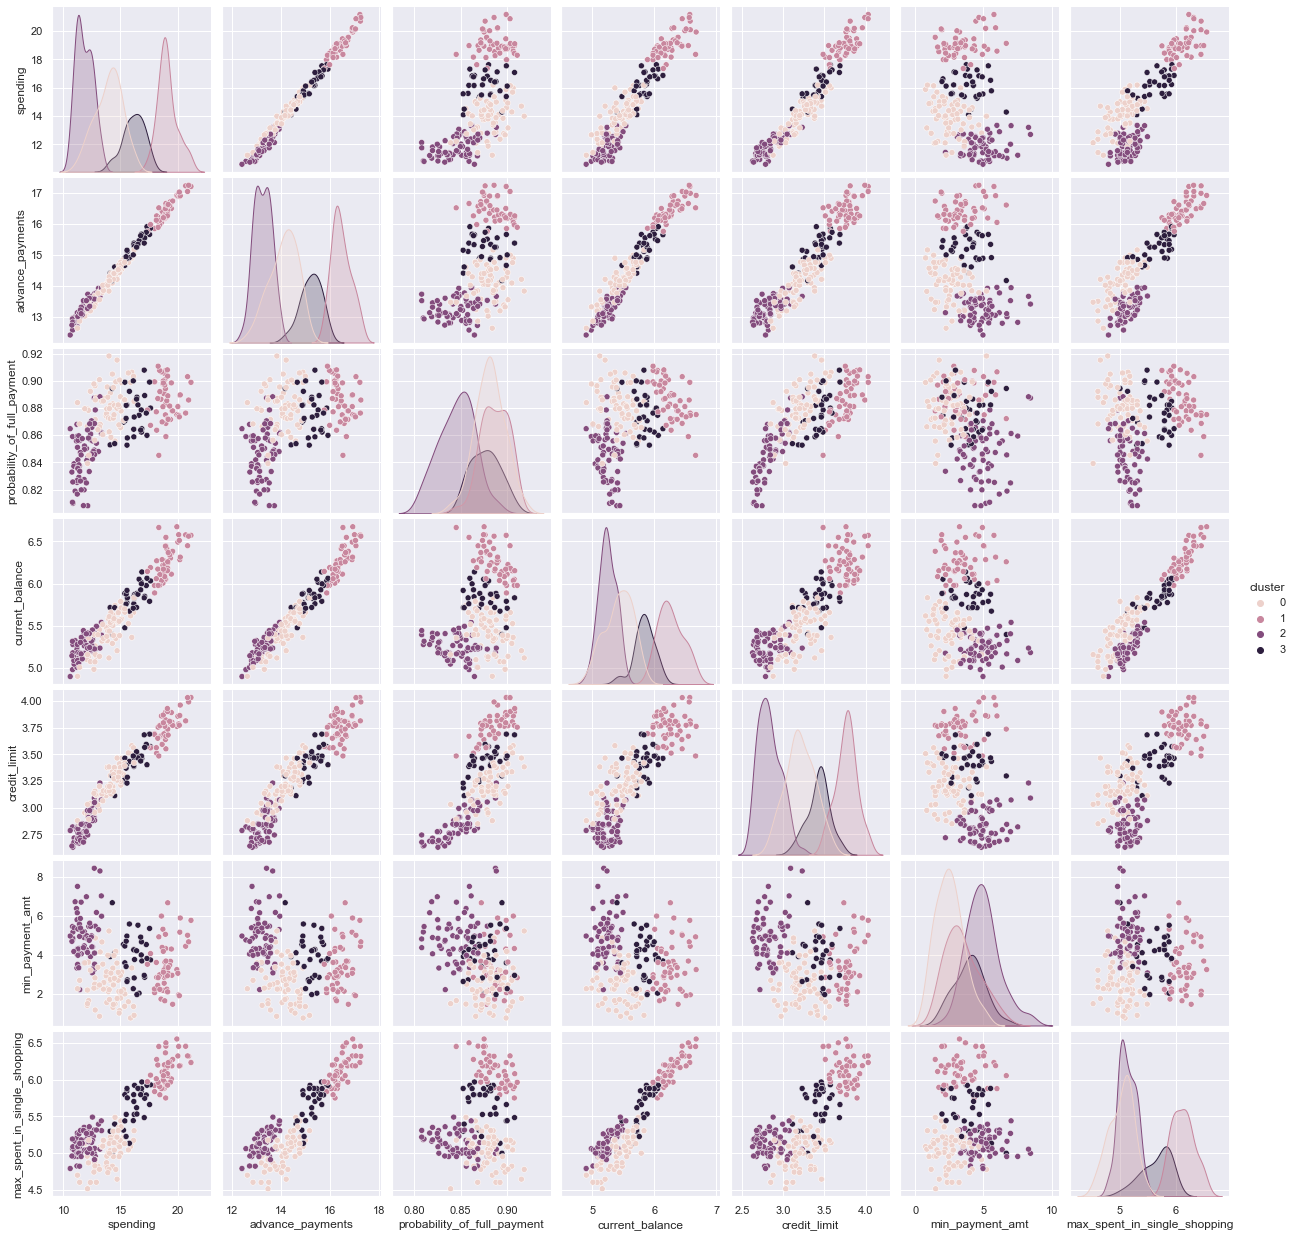

In [501]:
best_columns = ['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping']

best_columns.append("cluster")
plt.figure(figsize=(25,25))
sns.pairplot( df[best_columns], hue="cluster")

In [503]:
# Conclusion
#After executing different methods, I chose the Kmeans Model as data does not include different small groups but very similar in each other. Therefore, I did not prefer to use density-based algorithms. I can use this kind of algorithms to research for extreme customers in a credit card fraud. This study aims customer segmentation by using customer behaviors.

#Compering 2 different Kmeans Models showed that we have a better understanding of customer segmentation by using the 8 clusters model. Some of the outstanding results:

#Cluster 0: This customer group indicates a small group of customers who are small spenders with the lowest minimum payment.

#Cluster 1: These customers purchase frequently with the highest installment purchase frequency percentage contrast of a lower cash advance percentage. This group is using their credit cards for a small number of purchases.

#Cluster 2: This segment points out new customers with a lower credit limit and average balance level.

#Cluster 3: This cluster targets a group of customers who have a high balance and cash advances. This group also has a low purchase frequency. We can assume that this customer segment uses their credit cards as a loan.

#Cluster 4: A small group of customers with the highest credit limit and the highest minimum payments. We can assume that these customers tend to increase credit limits to follow up on their spending habits.

#Cluster 5: This segment has the lowest INSTALLMENTS_PURCHASES and PRC_FULL_PAYMENT percentages.

#Cluster 6: It is a similar customer segment with cluster 4 but with a lower Minimum Payment percentage.



In [ ]:
'spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping'

In [248]:
# UMAP

In [249]:
# UMAP is a nonlinear dimensionality reduction algorithm in the same family as t-SNE. 
# In the first phase of UMAP, a weighted k nearest neighbor graph is computed,
# in the second a low dimensionality layout of this is then calculated. 
# Then the embedded data points can be visualized in a new space and compared with other variables of interest

In [462]:
!pip install umap-learn[plot]

  Using cached umap_learn-0.5.1-py3-none-any.whl
  Using cached pynndescent-0.5.2-py3-none-any.whl
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)
  Created wheel for datashape: filename=datashape-0.5.2-py3-none-any.whl size=59441 sha256=0db24ed0078c9bab01c21f10d7566e8e46c4aad205de2076fa84ac3f28c8772f
  Stored in directory: c:\users\aditya rishi\appdata\local\pip\cache\wheels\6d\79\c4\c425774559165f472d32e5ef592ff9a71179abb31f05dbc98b
Successfully built datashape


In [468]:
!pip install tensorflow

  Using cached tensorflow-2.5.0-cp38-cp38-win_amd64.whl (422.6 MB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached grpcio-1.34.1-cp38-cp38-win_amd64.whl (2.9 MB)
  Using cached protobuf-3.17.3-py2.py3-none-any.whl (173 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached absl_py-0.13.0-py3-none-any.whl (132 kB)
  Using cached tensorflow_estimator-2.5.0-py2.py3-none-any.whl (462 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tensorboard-2.5.0-py3-none-any.whl (6.0 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached google_auth-1.32.0-py2.py3-none-any.whl (147 kB)
  Using cache

In [470]:
!pip install umap-learn[parametric_umap]

In [472]:
import umap
from sklearn.datasets import load_digits

fit= umap.UMAP(n_neighbors=5, min_dist=0.3, metric='correlation')
#umap_results=fit.fit_transform(df_nor)

AttributeError: module 'umap' has no attribute 'UMAP'

In [458]:
plt.figure(figsize=(10,10))
plt.scatter(umap_results[:, 0], umap_results[:, 1], cmap='Spectral',
            c = KMeans(n_clusters=8, random_state=40).fit_predict(umap_results), s=8) 

NameError: name 'umap_results' is not defined

<Figure size 720x720 with 0 Axes>

In [ ]:
'spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping'

In [85]:
# from itertools import product

# eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
# min_samples = np.arange(3,10) # min_samples values to be investigated
# DBSCAN_params = list(product(eps_values, min_samples))

In [112]:
# no_of_clusters = []
# sil_score = []

# for p in DBSCAN_params:
#    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_numerics)
#    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
#    sil_score.append(silhouette_score(X_numerics, DBS_clustering.labels_))

In [113]:
# df=pd.read_csv("bank_marketing_part1_Data-1.csv")
# fig, ax = plt.subplots(figsize=(8,8))
# df.plot(ax=ax, kind='scatter')
# plt.show()

In [62]:
# clustering = DBSCAN(eps = 1, min_samples = 5).fit(X)
# cluster = clustering.labels_
# X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
# plt.scatter(X[:,0], X[:,1])
# neigh = NearestNeighbors(n_neighbors=2)
# nbrs = neigh.fit(X)
# distances, indices = nbrs.kneighbors(X)

In [63]:
# distances = np.sort(distances, axis=0)
# distances = distances[:,1]
# plt.plot(distances)

In [64]:
# m = DBSCAN(eps=0.3, min_samples=5)
# m.fit(X)

In [65]:
# clusters = m.labels_

In [66]:
# colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
# vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

In [67]:
# plt.scatter(X[:,0], X[:,1], c=vectorizer(clusters))

In [156]:
## from itertools import product

# eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
# min_samples = np.arange(0,10) # min_samples values to be investigated
# DBSCAN_params = list(product(eps_values, min_samples))

In [158]:
# Collecting number of generated clusters

In [169]:
# DBS_clustering = DBSCAN(eps=0.05, min_samples=4).fit(X_numerics)

# DBSCAN_clustered = X_numerics.copy()
# DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [68]:
# DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
# DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
# DBSCAN_clust_sizes

In [69]:
# no_of_clusters = []
# sil_score = []

# for p in DBSCAN_params:
#    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_numerics)
#    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
#    sil_score.append(silhouette_score(X_numerics, DBS_clustering.labels_))

In [70]:
# tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
# tmp['No_of_clusters'] = no_of_clusters

# pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

# fig, ax = plt.subplots(figsize=(12,6))
# sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
# ax.set_title('Number of clusters')
# plt.show()

In [77]:
db_cluster = DBSCAN(eps=9.7, min_samples=40, algorithm='ball_tree', metric='euclidean', leaf_size=90, p=2)
arr = db_cluster.fit_predict(data)
print("Clusters assigned are:", set(db_cluster.labels_))

uni, counts = np.unique(arr, return_counts=True)
d = dict(zip(uni, counts))
print(d)

ValueError: Expected 2D array, got 1D array instead:
array=[Scatter3d({
     'marker': {'size': 5},
     'mode': 'markers',
     'name': 'Cluster 0',
     'x': array([19.94, 18.95, 17.99, 18.17, 18.55, 18.98, 17.98, 19.51, 18.72, 20.03,
                 19.06, 18.96, 18.83, 18.72, 19.46, 19.38, 18.81, 18.65, 18.85, 20.71,
                 19.15, 20.1 , 20.2 , 18.94, 18.59, 21.18, 18.43, 19.57, 17.63, 19.31,
                 18.89, 18.94, 18.36, 18.75, 20.24, 17.32, 20.97, 18.3 , 18.98, 17.63,
                 19.14, 17.55, 19.13, 17.36, 20.88, 18.88, 17.26, 18.27, 18.45, 20.16,
                 19.11, 18.14, 18.76, 19.18]),
     'y': array([16.92, 16.42, 15.86, 16.26, 16.22, 16.57, 15.85, 16.71, 16.34, 16.9 ,
                 16.45, 16.2 , 16.29, 16.19, 16.5 , 16.72, 16.29, 16.41, 16.17, 17.23,
                 16.45, 16.99, 16.89, 16.32, 16.05, 17.21, 15.97, 16.74, 15.86, 16.59,
                 16.23, 16.49, 16.52, 16.18, 16.91, 15.91, 17.25, 15.89, 16.66, 15.98,
                 16.61, 15.66, 16.31, 15.76, 17.05, 16.26, 15.73, 16.09, 16.12, 17.03,
                 16.26, 16.12, 16.2 , 16.63]),
     'z': array([0.8752, 0.8829, 0.8992, 0.8637, 0.8865, 0.8687, 0.8993, 0.878 , 0.881 ,
                 0.8811, 0.8854, 0.9077, 0.8917, 0.8977, 0.8985, 0.8716, 0.8906, 0.8698,
                 0.9056, 0.8763, 0.889 , 0.8746, 0.8894, 0.8942, 0.9066, 0.8989, 0.9077,
                 0.8779, 0.88  , 0.8815, 0.9008, 0.875 , 0.8452, 0.8999, 0.8897, 0.8599,
                 0.8859, 0.9108, 0.859 , 0.8673, 0.8722, 0.8991, 0.9035, 0.8785, 0.9031,
                 0.8969, 0.8763, 0.887 , 0.8921, 0.8735, 0.9081, 0.8772, 0.8984, 0.8717])
 })
 Scatter3d({
     'marker': {'size': 5},
     'mode': 'markers',
     'name': 'Cluster 1',
     'x': array([10.83, 12.7 , 12.02, 11.23, 12.15, 12.79, 10.8 , 12.37, 13.07, 11.02,
                 11.35, 11.23, 11.84, 12.55, 11.82, 11.19, 11.14, 12.22, 11.81, 10.79,
                 11.18, 12.38, 11.83, 10.93, 11.41, 11.27, 12.19, 12.49, 13.34, 12.13,
                 10.91, 13.2 , 13.99, 11.18, 11.87, 10.82, 13.37, 13.32, 12.8 , 12.89,
                 11.21, 14.28, 11.48, 11.56, 12.46, 11.4 , 11.36, 12.05, 11.27, 11.24,
                 11.34, 12.19, 10.74, 12.44, 12.11, 11.26, 12.72, 11.65, 11.49, 10.59,
                 11.75, 12.26, 12.3 , 12.01, 11.55]),
     'y': array([12.96, 13.41, 13.33, 12.88, 13.45, 13.53, 12.57, 13.47, 13.92, 13.  ,
                 13.12, 12.82, 13.21, 13.57, 13.4 , 13.05, 12.79, 13.32, 13.45, 12.93,
                 12.72, 13.44, 13.23, 12.8 , 12.95, 12.97, 13.2 , 13.46, 13.95, 13.73,
                 12.8 , 13.66, 13.83, 13.04, 13.02, 12.83, 13.78, 13.94, 13.47, 13.77,
                 13.13, 14.17, 13.05, 13.31, 13.41, 13.08, 13.05, 13.41, 12.86, 13.  ,
                 12.87, 13.36, 12.73, 13.59, 13.27, 13.01, 13.57, 13.07, 13.22, 12.41,
                 13.52, 13.6 , 13.34, 13.52, 13.1 ]),
     'z': array([0.8099, 0.8874, 0.8503, 0.8511, 0.8443, 0.8786, 0.859 , 0.8567, 0.848 ,
                 0.8189, 0.8291, 0.8594, 0.8521, 0.8558, 0.8274, 0.8253, 0.8558, 0.8652,
                 0.8198, 0.8107, 0.868 , 0.8609, 0.8496, 0.839 , 0.856 , 0.8419, 0.8783,
                 0.8658, 0.862 , 0.8081, 0.8372, 0.8883, 0.9183, 0.8266, 0.8795, 0.8256,
                 0.8849, 0.8613, 0.886 , 0.8541, 0.8167, 0.8944, 0.8473, 0.8198, 0.8706,
                 0.8375, 0.8382, 0.8416, 0.8563, 0.8359, 0.8596, 0.8579, 0.8329, 0.8462,
                 0.8639, 0.8355, 0.8686, 0.8575, 0.8263, 0.8648, 0.8082, 0.8333, 0.8684,
                 0.8249, 0.8455])
 })
 Scatter3d({
     'marker': {'size': 5},
     'mode': 'markers',
     'name': 'Cluster 2',
     'x': array([15.99, 16.14, 15.11, 15.56, 15.88, 16.87, 16.23, 14.79, 15.26, 15.03,
                 16.82, 14.49, 16.63, 15.38, 16.17, 15.26, 16.16, 15.38, 15.69, 15.6 ,
                 15.01, 14.86, 14.59, 15.78, 14.99, 16.2 , 15.38, 15.5 , 15.05, 16.19,
                 14.69, 16.44, 17.12, 16.84, 15.49, 14.43, 15.36, 16.53, 17.08, 14.8 ,
                 16.41, 16.77, 16.12, 15.57]),
     'y': array([14.89, 14.99, 14.54, 14.89, 14.9 , 15.65, 15.18, 14.52, 14.85, 14.77,
                 15.51, 14.61, 15.46, 14.9 , 15.38, 14.84, 15.33, 14.66, 14.75, 15.11,
                 14.76, 14.67, 14.28, 14.91, 14.56, 15.27, 14.77, 14.86, 14.68, 15.16,
                 14.49, 15.25, 15.55, 15.67, 14.94, 14.4 , 14.76, 15.34, 15.38, 14.52,
                 15.25, 15.62, 15.  , 15.15]),
     'z': array([0.9064, 0.9034, 0.8986, 0.8823, 0.8988, 0.8648, 0.885 , 0.8819, 0.8696,
                 0.8658, 0.8786, 0.8538, 0.8747, 0.8706, 0.8588, 0.871 , 0.8644, 0.899 ,
                 0.9058, 0.858 , 0.8657, 0.8676, 0.8993, 0.8923, 0.8883, 0.8734, 0.8857,
                 0.882 , 0.8779, 0.8849, 0.8799, 0.888 , 0.8892, 0.8623, 0.8724, 0.8751,
                 0.8861, 0.8823, 0.9079, 0.8823, 0.8866, 0.8638, 0.9   , 0.8527])
 })
 Scatter3d({
     'marker': {'size': 5},
     'mode': 'markers',
     'name': 'Cluster 3',
     'x': array([13.74, 14.09, 12.1 , 13.22, 12.7 , 12.62, 12.78, 13.78, 13.84, 13.16,
                 12.73, 14.34, 14.11, 13.54, 14.29, 14.52, 12.88, 13.94, 14.33, 13.5 ,
                 12.08, 12.54, 14.11, 14.11, 14.46, 12.36, 14.92, 12.74, 13.8 , 14.16,
                 11.42, 14.7 , 13.02, 12.76, 11.43, 14.38, 12.21, 14.37, 13.45, 12.67,
                 14.01, 12.11, 13.16, 11.23, 14.88, 13.89, 14.03]),
     'y': array([14.05, 14.41, 13.15, 13.84, 13.71, 13.67, 13.57, 14.06, 13.94, 13.82,
                 13.75, 14.37, 14.1 , 13.85, 14.09, 14.6 , 13.5 , 14.17, 14.28, 13.85,
                 13.23, 13.67, 14.26, 14.18, 14.35, 13.19, 14.43, 13.67, 14.04, 14.4 ,
                 12.86, 14.21, 13.76, 13.38, 13.13, 14.21, 13.47, 14.39, 14.02, 13.32,
                 14.29, 13.47, 13.55, 12.63, 14.57, 14.02, 14.16]),
     'z': array([0.8744, 0.8529, 0.8793, 0.868 , 0.8491, 0.8481, 0.8716, 0.8759, 0.8955,
                 0.8662, 0.8458, 0.8726, 0.8911, 0.8871, 0.905 , 0.8557, 0.8879, 0.8728,
                 0.8831, 0.8852, 0.8664, 0.8425, 0.8722, 0.882 , 0.8818, 0.8923, 0.9006,
                 0.8564, 0.8794, 0.8584, 0.8683, 0.9153, 0.8641, 0.8964, 0.8335, 0.8951,
                 0.8453, 0.8726, 0.8604, 0.8977, 0.8625, 0.8392, 0.9009, 0.884 , 0.8811,
                 0.888 , 0.8796])
 })                                                                                     ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
'spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping